# Lesson

## Import

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Code

In [2]:
def compute_model(y_name, X_name, data):
    y = data.loc[:, y_name]
    X = sm.add_constant(data.loc[:, X_name].values)
    model = sm.OLS(y, X).fit()
    return show_table(model, X_name)

In [3]:
def show_table(model, X_name):
    index_name = ['Intercept']

    if isinstance(X_name, str):
        index_name.append(X_name)
    elif isinstance(X_name, list):
        index_name = index_name + X_name

    df = pd.read_html(model.summary2().as_html())[1]
    colname = df.iloc[0]
    df = df.rename(columns=df.iloc[0]).drop(0).set_index(np.nan)
    df.index.name = None
    df.index = index_name

    return df

In [4]:
def compute_VIF(columns, data):
    X = data.loc[:, columns]
    X.loc[:, 'Intercept'] = 1
      
    vif = pd.DataFrame()
    vif.loc[:, 'variables'] = X.columns
    vif.loc[:, 'VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
      
    return vif.drop(vif.tail(1).index)

In [5]:
advertising = pd.read_csv('data/Advertising.csv')
credit = pd.read_csv('data/Credit.csv')

In [6]:
# table 3.2
y = advertising['sales']
X = advertising[['TV']]
X = sm.add_constant(X)
slr = sm.OLS(y, X).fit()
rss = slr.resid.std(ddof=X.shape[1])
print(f'RSS: {rss}')
slr.summary().tables[0]

RSS: 3.2586563686504624


<class 'statsmodels.iolib.table.SimpleTable'>

In [7]:
# table 3.1
compute_model('sales', 'TV', advertising)

Coef. Std.Err.        t   P>|t|  [0.025  0.975]
Intercept  7.0326   0.4578  15.3603  0.0000  6.1297  7.9355
TV         0.0475   0.0027  17.6676  0.0000  0.0422  0.0528

In [8]:
# table 3.3
compute_model('sales', 'radio', advertising)

Coef. Std.Err.        t   P>|t|  [0.025   0.975]
Intercept  9.3116   0.5629  16.5422  0.0000  8.2016  10.4217
radio      0.2025   0.0204   9.9208  0.0000  0.1622   0.2427

In [9]:
# table 3.3
compute_model('sales', 'newspaper', advertising)

Coef. Std.Err.        t   P>|t|   [0.025   0.975]
Intercept  12.3514   0.6214  19.8761  0.0000  11.1260  13.5769
newspaper   0.0547   0.0166   3.2996  0.0011   0.0220   0.0874

In [10]:
# table 3.4
y = advertising['sales']
X = advertising[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)
mlr = sm.OLS(y, X).fit()
mlr.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

In [11]:
# table 3.6
y = advertising['sales']
X = advertising[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)
mlr = sm.OLS(y, X).fit()
rss = mlr.resid.std(ddof=X.shape[1])
print(f'RSS: {rss}')
mlr.summary().tables[0]

RSS: 1.685510373414744


<class 'statsmodels.iolib.table.SimpleTable'>

In [12]:
# table 3.7
credit_owner_dummy = pd.get_dummies(credit, columns=['Own'])
compute_model('Balance', 'Own_Yes', credit_owner_dummy)

Coef. Std.Err.        t   P>|t|    [0.025    0.975]
Intercept  509.8031  33.1281  15.3889  0.0000  444.6752  574.9310
Own_Yes     19.7331  46.0512   0.4285  0.6685  -70.8009  110.2671

In [13]:
# table 3.8
credit_region_dummy = pd.get_dummies(credit, columns=['Region'])
compute_model('Balance', ['Region_West', 'Region_South'], credit_region_dummy)

Coef. Std.Err.        t   P>|t|     [0.025    0.975]
Intercept     531.0000  46.3187  11.4641  0.0000   439.9394  622.0606
Region_West   -18.6863  65.0211  -0.2874  0.7740  -146.5149  109.1424
Region_South  -12.5025  56.6810  -0.2206  0.8255  -123.9350   98.9300

In [14]:
# table 3.9
advertising['TVxradio'] = advertising['TV'] * advertising['radio']
compute_model('sales', ['TV', 'radio', 'TVxradio'], advertising)

Coef. Std.Err.        t   P>|t|  [0.025  0.975]
Intercept  6.7502   0.2479  27.2328  0.0000  6.2614  7.2391
TV         0.0191   0.0015  12.6990  0.0000  0.0161  0.0221
radio      0.0289   0.0089   3.2408  0.0014  0.0113  0.0464
TVxradio   0.0011   0.0001  20.7266  0.0000  0.0010  0.0012

In [15]:
# table 3.11
groupby_cols = ['model', 'column']

model_1_df = compute_model('Balance', ['Age', 'Limit'], credit)
model_1_df['model'] = 'Model 1'
model_2_df = compute_model('Balance', ['Rating', 'Limit'], credit)
model_2_df['model'] = 'Model 2'

model_df = pd.concat([model_1_df, model_2_df]).reset_index()
model_df.rename(columns = {'index': 'column'}, inplace=True)
model_df = model_df.groupby(groupby_cols, group_keys=True).apply(lambda a: a[:])
model_df[model_df.columns.drop(groupby_cols)]

Coef. Std.Err.        t   P>|t|     [0.025     0.975]
model   column                                                                
Model 1 Age       1    -2.2915   0.6725  -3.4075  0.0007    -3.6136    -0.9694
        Intercept 0  -173.4109  43.8284  -3.9566  0.0001  -259.5756   -87.2462
        Limit     2     0.1734   0.0050  34.4959  0.0000     0.1635     0.1832
Model 2 Intercept 3  -377.5368  45.2542  -8.3426  0.0000  -466.5046  -288.5690
        Limit     5     0.0245   0.0638   0.3840  0.7012    -0.1010     0.1500
        Rating    4     2.2017   0.9523   2.3120  0.0213     0.3295     4.0738

In [16]:
compute_VIF(['TV', 'radio', 'newspaper'], advertising)

variables       VIF
0         TV  1.004611
1      radio  1.144952
2  newspaper  1.145187

# Lab

## Import

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

In [18]:
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300

In [19]:
IMG_EXPORT_CONFIG = {
    'dpi': 500,
    'bbox_inches': 'tight',
    'pad_inches': 0.15,
}

In [20]:
sns.set_theme(style='whitegrid')
sns.set_palette('hls', 8)

## Code

The `boston` dataset records `medv` (median house value) for 506 neighborhoods around Boston. 

We will build a regression model to predict `medv` using **13** predictors such as:
- `rmvar` (average number of rooms per house),
- `age` (proportion of owner-occupied units built prior to 1940), and
- `lstat` (percent of households with low socioeconomic status).

In [21]:
boston_df = load_data('Boston')
boston_df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

In [22]:
boston_df?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        /opt/homebrew/lib/python3.10/site-packages/pandas/core/frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

### Simple Linear Regression

Our response will be `medv` and `lstat` will be the single predictor.

In [23]:
X = pd.DataFrame({
    'intercept': np.ones(boston_df.shape[0]),
    'lstat': boston_df['lstat'],
})
X.head()

intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
4        1.0   5.33

`sm.OLS()` does not fit the model, rather it specifies the model, and then `model.fit()` does the actual fitting.

In [24]:
y = boston_df['medv']
slr = sm.OLS(y, X)
slr_result = slr.fit()

In [25]:
summarize(slr_result)

coef  std err       t  P>|t|
intercept  34.5538    0.563  61.415    0.0
lstat      -0.9500    0.039 -24.528    0.0

In [26]:
slr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           5.08e-88
Time:                        10:37:29   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
slr_result.params

intercept    34.553841
lstat        -0.950049
dtype: float64

#### Using Transformations: Fit and Transform

`ModelSpec()` (renamed `MS()` in the preamble) creates a transform object, and then a pair of methods `transform()` and `fit()` are used to construct a corresponding model matrix.

In this simple case, the `fit()` method does very little; it simply checks that the variable `lstat` specified in design exists in `boston`. Then `transform()` constructs the model matrix with two columns: an intercept and the variable `lstat`.

These two operations can be combined with the `fit_transform()` method.

In [28]:
design = MS(['lstat'])
# option 1
design = design.fit(boston_df)
X = design.transform(boston_df)
# option 2
X = design.fit_transform(boston_df)
X.head()

intercept  lstat
0        1.0   4.98
1        1.0   9.14
2        1.0   4.03
3        1.0   2.94
4        1.0   5.33

The `get_prediction()` method can be used to obtain predictions, and produce confidence intervals and prediction intervals for the prediction of `medv` for given values of `lstat`.

In [29]:
new_df = pd.DataFrame({'lstat': [5, 10, 15]})
new_X = design.transform(new_df)
new_X

intercept  lstat
0        1.0      5
1        1.0     10
2        1.0     15

In [30]:
new_pred = slr_result.get_prediction(new_X)
new_pred.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [31]:
# confidence interval
new_pred.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [32]:
# prediction internal
new_pred.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

The 95% confidence interval associated with an `lstat` value of 10 is (24.47, 25.63), and the 95% prediction interval is (12.82, 37.28).

#### Defining Functions

In [33]:
def add_linear_line(ax, m, b, *args, **kwargs):
    """ Add a line with slope m and intercept b to ax """
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

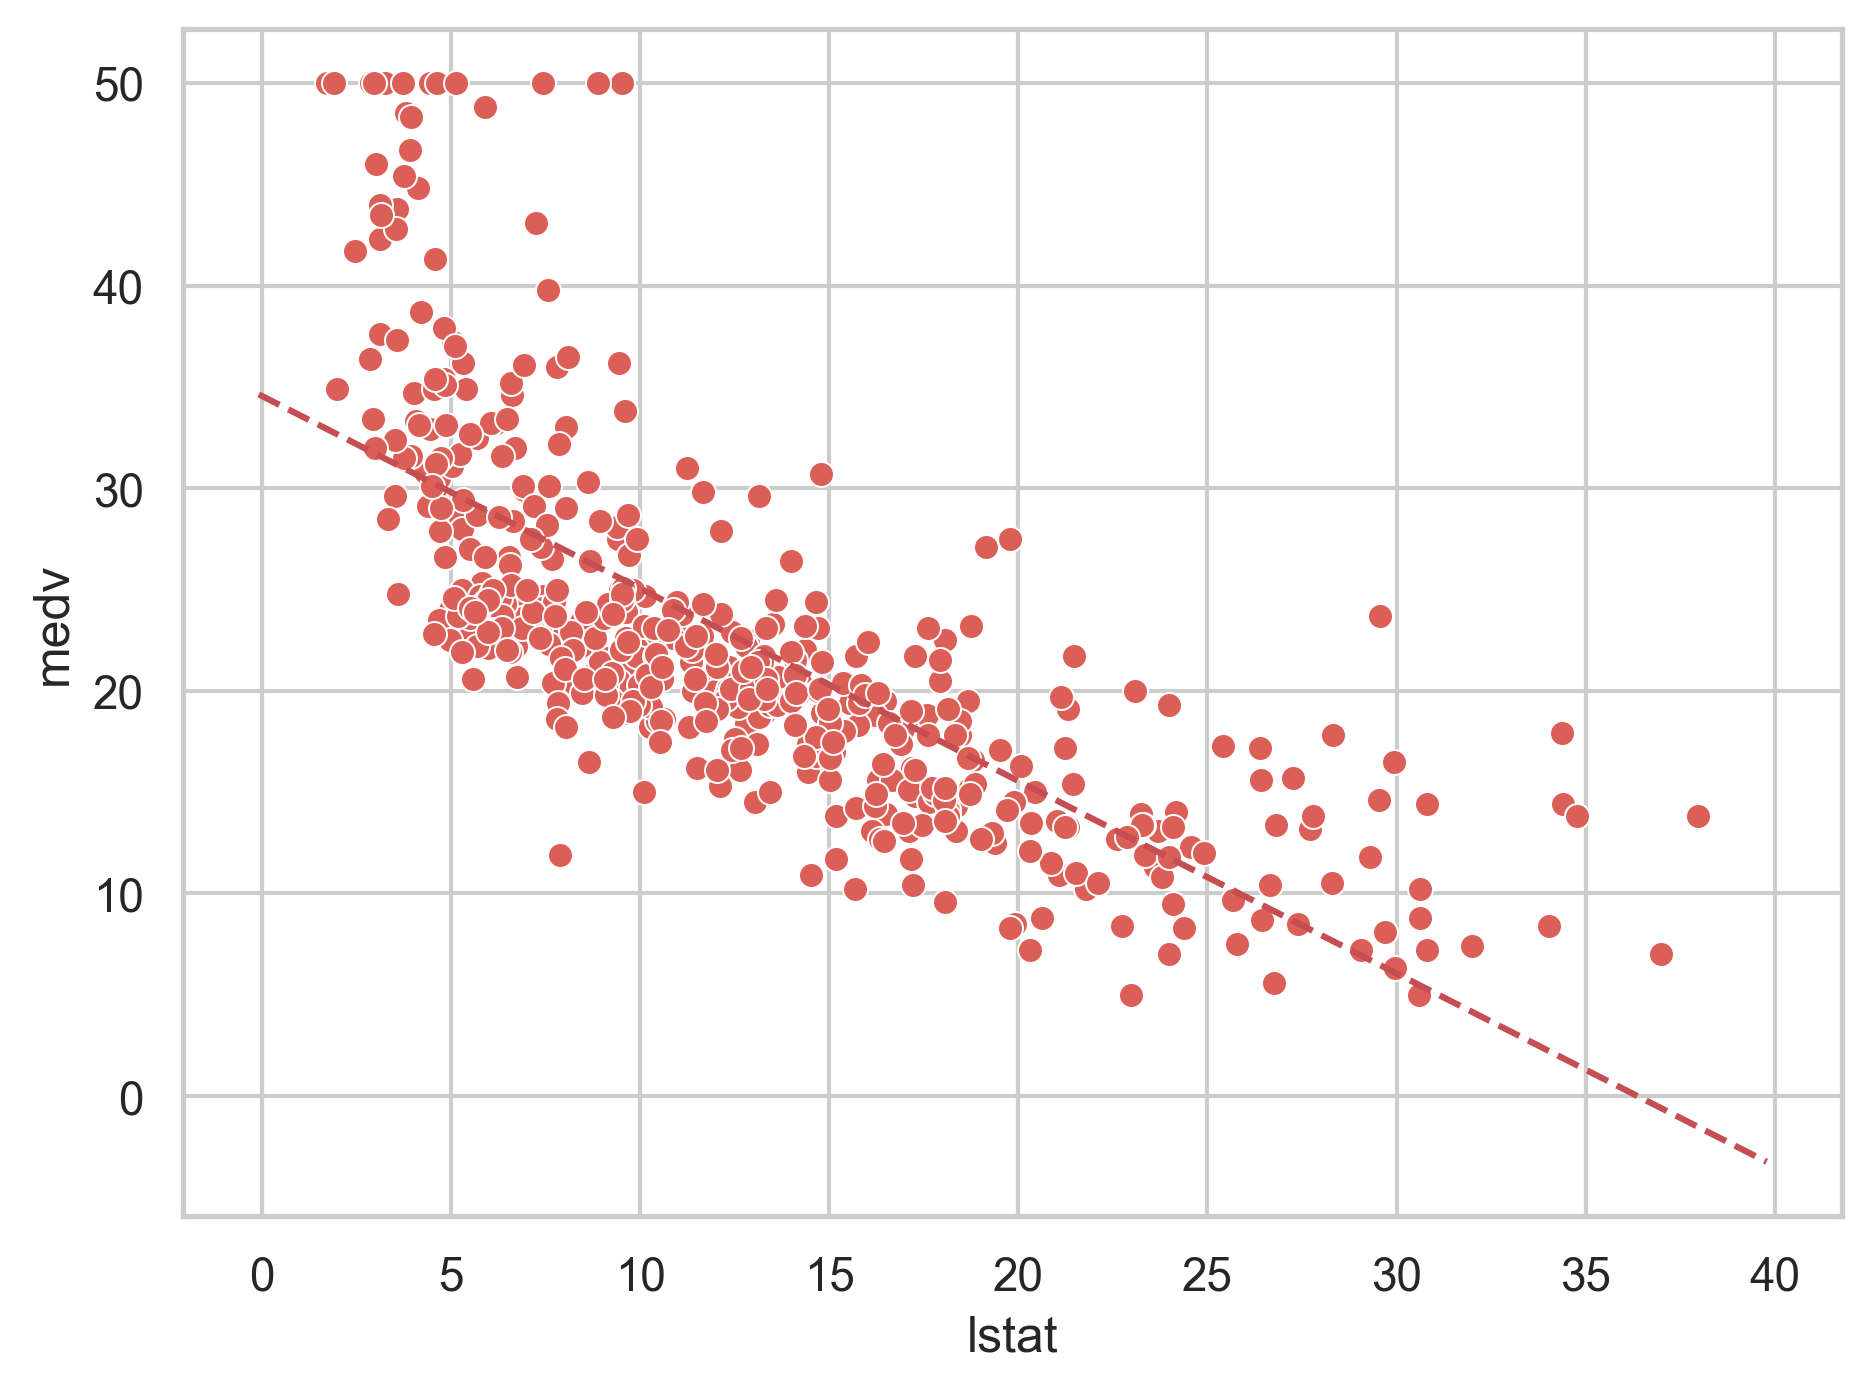

In [34]:
fig, ax = plt.subplots()
sns.scatterplot(x='lstat', y='medv', data=boston_df, ax=ax)
add_linear_line(ax, slr_result.params[1], slr_result.params[0], 'r--')
fig.tight_layout()

We plot the fitted values (`.fittedvalues`) against theirs residuals (`.resid`). We add a horizontal line at `0` for reference using the `ax.axhline()` method, indicating it should be black (`c='k'`) and have a dashed linestyle (`ls='--'`).

From the plot, there is some evidence of non-linearity.

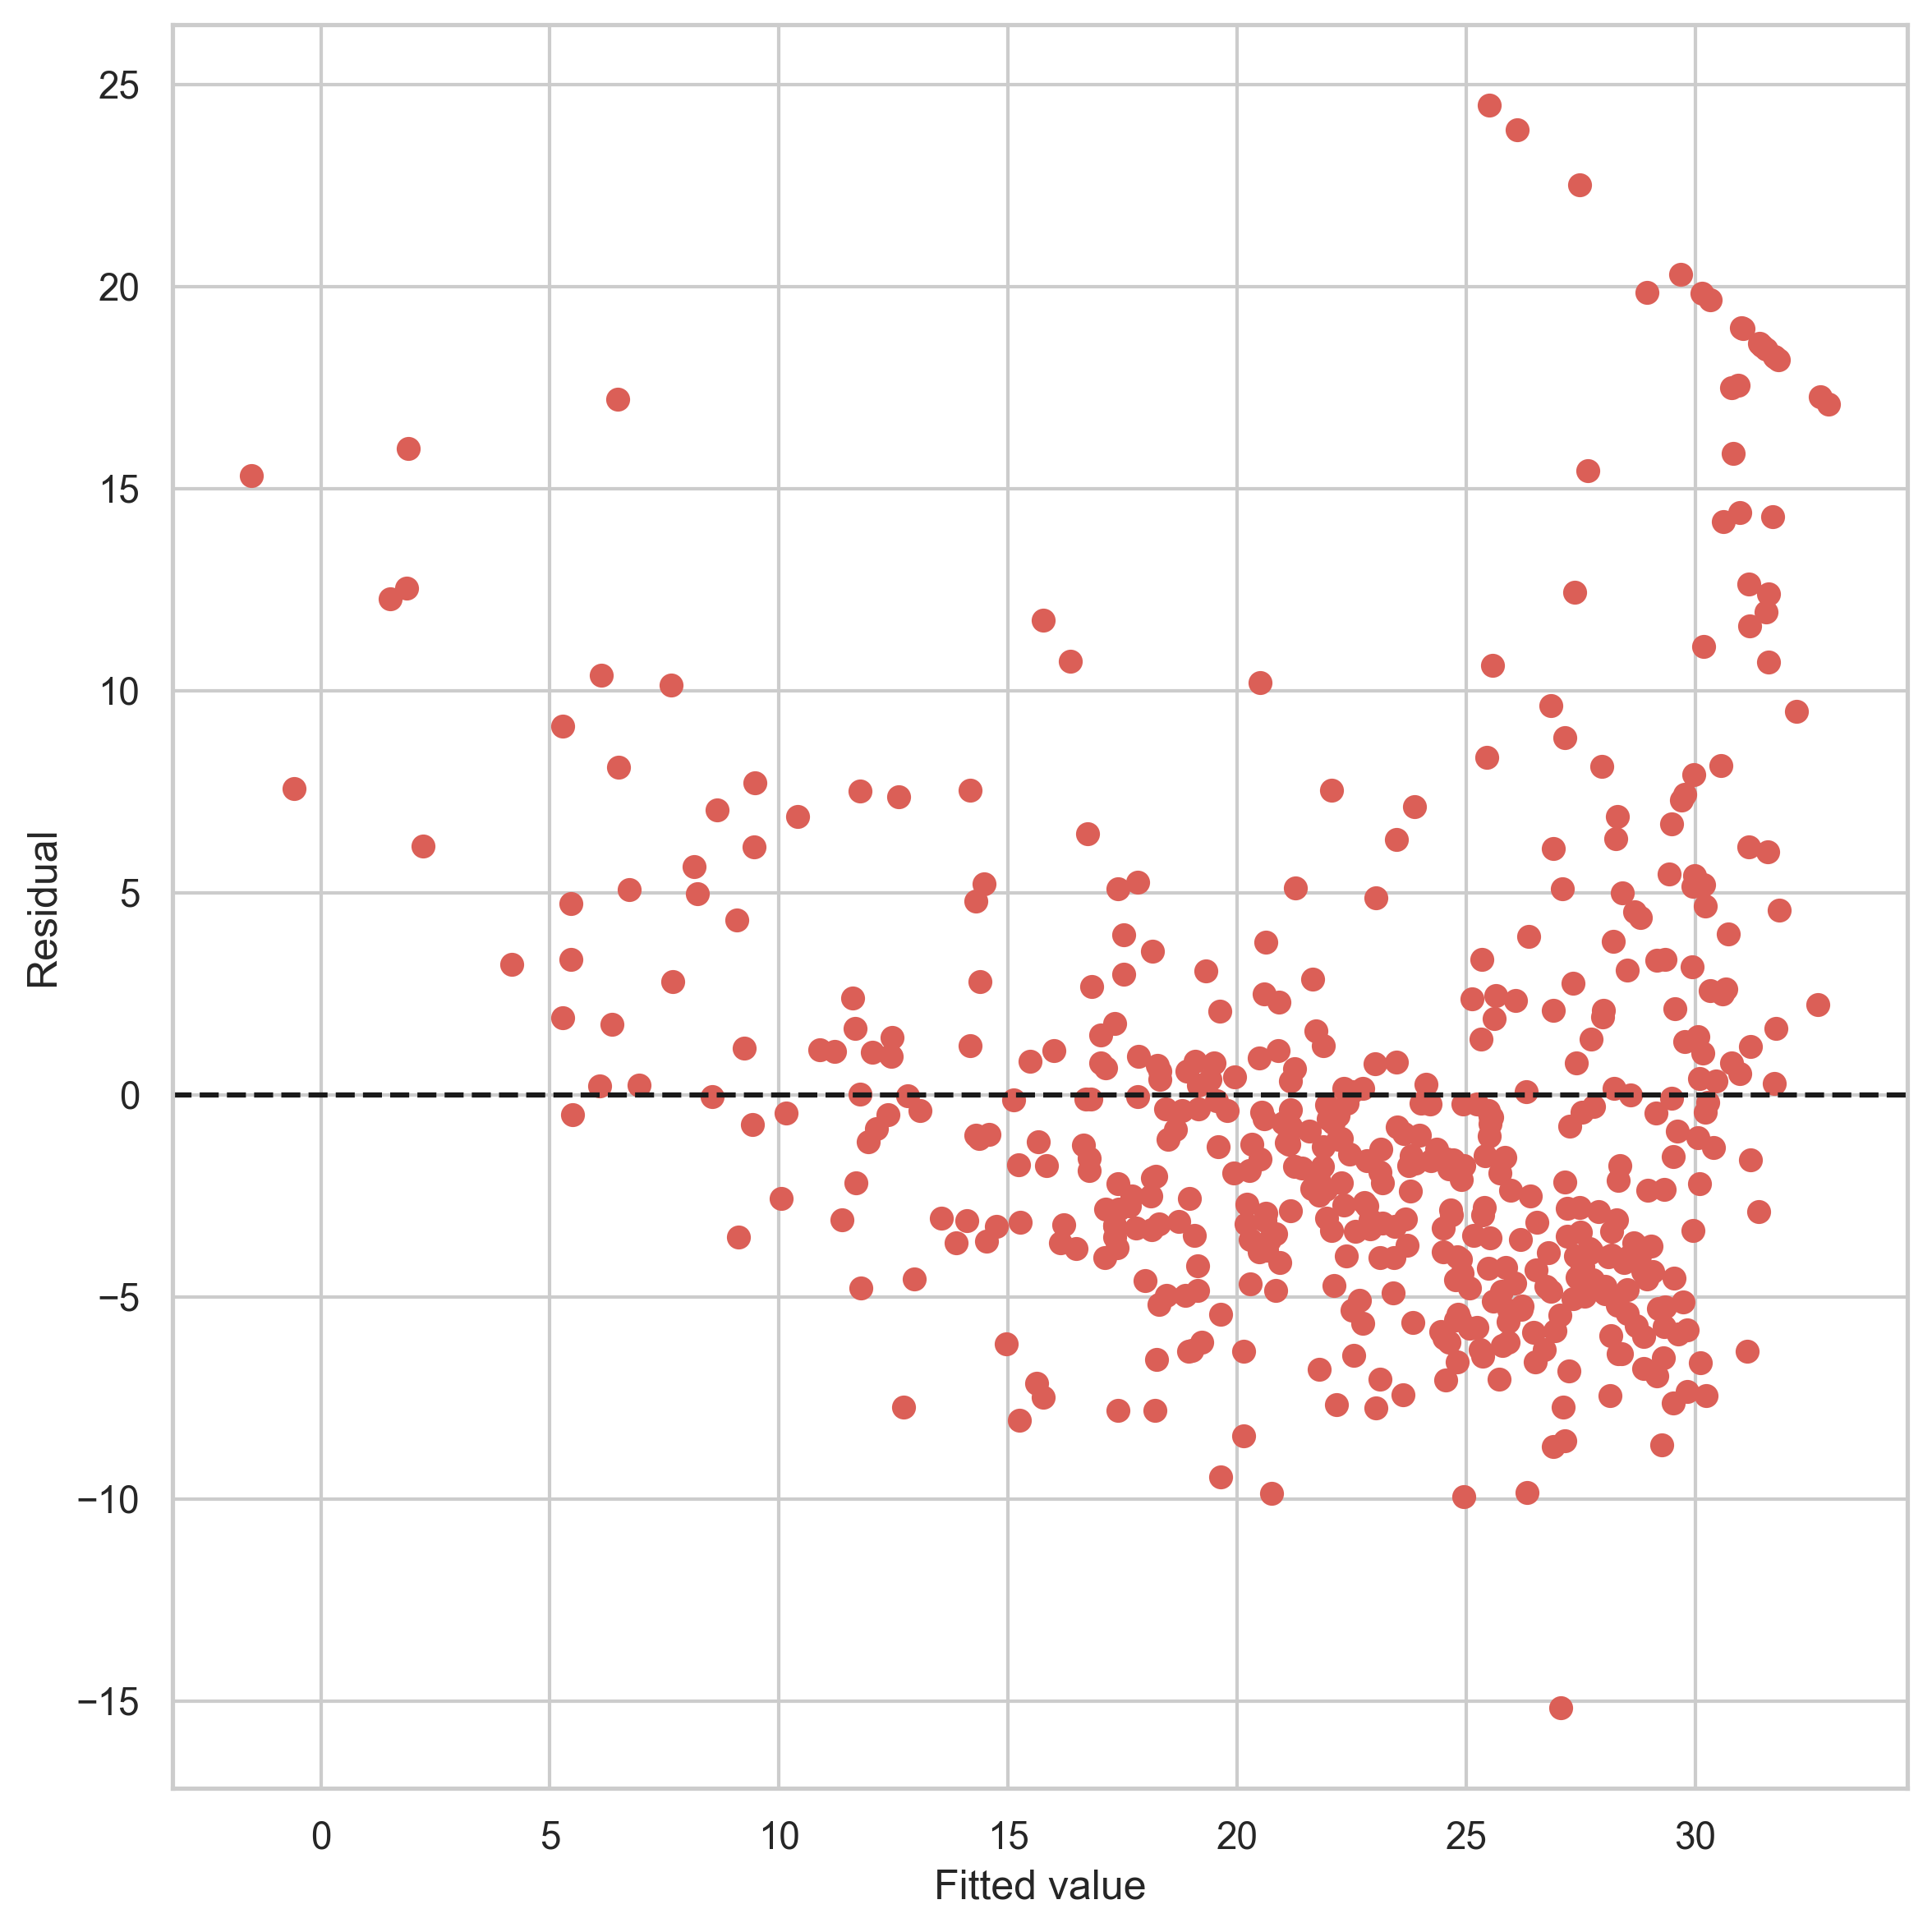

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(slr_result.fittedvalues, slr_result.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
fig.tight_layout()

Various influence measures describing the regression model are computed with the `get_influence()` method.

Leverage statistics can be computed for any number of predictors using the `hat_matrix_diag` attribute of the value returned by the `get_influence()` method.

The `np.argmax()` function identifies the index of the largest element of an array, optionally computed over an axis of the array.

In [36]:
influence = slr_result.get_influence()
influence.summary_frame()

dfb_intercept  dfb_lstat   cooks_d  standard_resid  hat_diag  \
0        -0.059716   0.044977  0.001886       -0.938750  0.004263   
1        -0.028156   0.015069  0.000582       -0.687871  0.002456   
2         0.044083  -0.034510  0.001004        0.641041  0.004864   
3         0.019757  -0.016039  0.000198        0.264480  0.005640   
4         0.066762  -0.049471  0.002384        1.081699  0.004059   
..             ...        ...       ...             ...       ...   
501      -0.018179   0.008887  0.000266       -0.477868  0.002322   
502      -0.035414   0.019126  0.000912       -0.858140  0.002472   
503      -0.051219   0.037367  0.001421       -0.853618  0.003886   
504      -0.057161   0.039732  0.001843       -1.031025  0.003456   
505      -0.117415   0.073149  0.008567       -2.443658  0.002861   

     dffits_internal  student_resid    dffits  
0          -0.061420      -0.938639 -0.061413  
1          -0.034128      -0.687511 -0.034110  
2           0.044815       0.640666  0.044789  
3           0.019918       0.264236  0.019900  
4           0.069053       1.081882  0.069065  
..               ...            ...       ...  
501        -0.023053      -0.477502 -0.023035  
502        -0.042719      -0.857915 -0.042708  
503        -0.053317      -0.853387 -0.053303  
504        -0.060717      -1.031090 -0.060721  
505        -0.130893      -2.455825 -0.131545  

[506 rows x 8 columns]

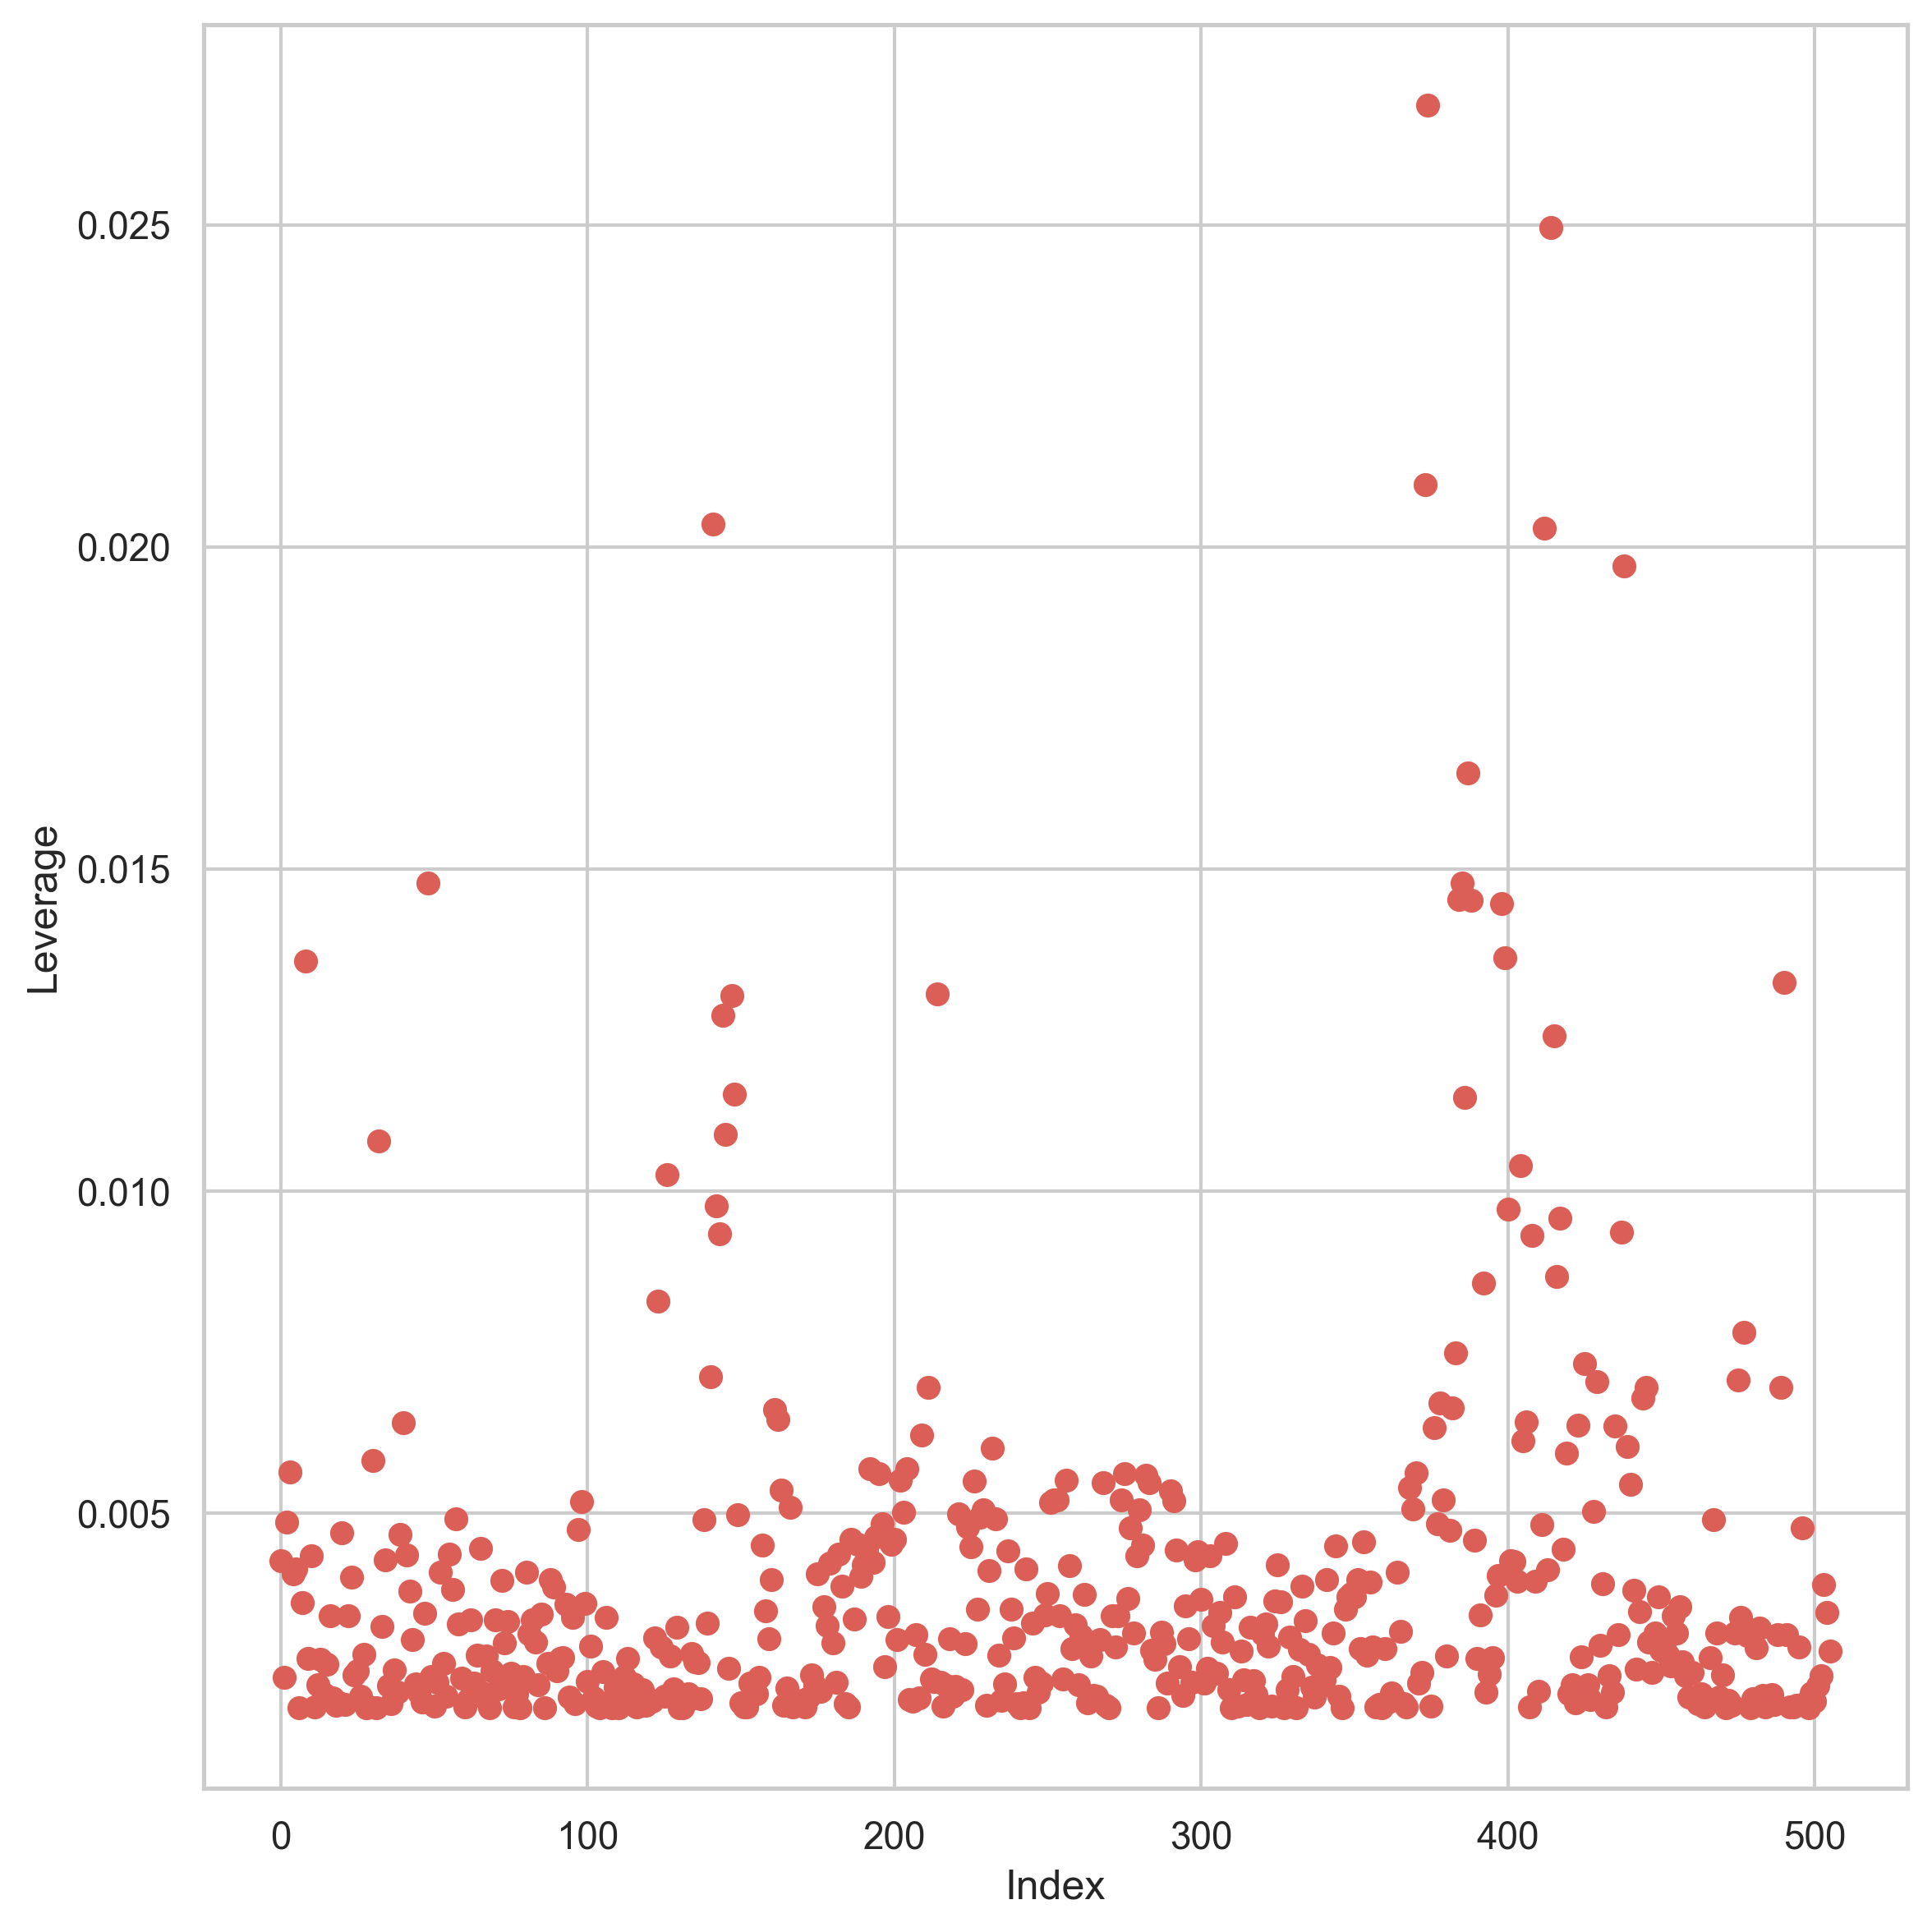

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(np.arange(X.shape[0]), influence.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(influence.hat_matrix_diag)
fig.tight_layout()

### Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the `ModelSpec()` transform to construct the required model matrix and response.

In [38]:
X = MS(['lstat', 'age']).fit_transform(boston_df)
mlr = sm.OLS(y, X)
mlr_result = mlr.fit()
summarize(mlr_result)

coef  std err       t  P>|t|
intercept  33.2228    0.731  45.458  0.000
lstat      -1.0321    0.048 -21.416  0.000
age         0.0345    0.012   2.826  0.005

Now, we will use all columns to predict `medv`.

In [39]:
terms = boston_df.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [40]:
new_X = MS(terms).fit_transform(boston_df)
new_mlr = sm.OLS(y, new_X)
new_mlr_result = mlr.fit()
summarize(new_mlr_result)

coef  std err       t  P>|t|
intercept  33.2228    0.731  45.458  0.000
lstat      -1.0321    0.048 -21.416  0.000
age         0.0345    0.012   2.826  0.005

From the summarize, we see that `indus` and `age` has high $p$-value. So we'd remove these 2 columns from the prediction.

In [41]:
new_terms = boston_df.columns.drop(['medv', 'indus', 'age'])
new_X = MS(new_terms).fit_transform(boston_df)
new_mlr = sm.OLS(y, new_X)
new_mlr_result = new_mlr.fit()
summarize(new_mlr_result)

coef  std err       t  P>|t|
intercept  41.4517    4.903   8.454  0.000
crim       -0.1217    0.033  -3.696  0.000
zn          0.0462    0.014   3.378  0.001
chas        2.8719    0.863   3.329  0.001
nox       -18.2624    3.565  -5.122  0.000
rm          3.6730    0.409   8.978  0.000
dis        -1.5160    0.188  -8.078  0.000
rad         0.2839    0.064   4.440  0.000
tax        -0.0123    0.003  -3.608  0.000
ptratio    -0.9310    0.130  -7.138  0.000
lstat      -0.5465    0.047 -11.519  0.000

### Multivariate Goodness of Fit

#### List Comprehension

**Variance Inflation Factor (VIF):** is the ratio of the variance of $\hat\beta_j$ when fitting the full model divided by the variance of $\hat\beta_j$ if fit on its own.

Function `VIF()` takes 2 arguments: a dataframe or array, and a variable column index.

In [42]:
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif': vals}, index=X.columns[1:])
vif

vif
lstat  1.569395
age    1.569395

### Interaction Terms

**Interaction Term:** constructed by computing the product of $X_1$ and $X_2$.

⟹ Extended model: $$Y = \beta_0 + \beta_1X1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon$$

Including a tuple `('lstat', 'age')` tells the model matrix builder to include an interaction term between `lstat` and `age`.

In [43]:
X_2 = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(boston_df)
mlr_2 = sm.OLS(y, X_2)
mlr_result_2 = mlr_2.fit()
summarize(mlr_result_2)

coef  std err       t  P>|t|
intercept  36.0885    1.470  24.553  0.000
lstat      -1.3921    0.167  -8.313  0.000
age        -0.0007    0.020  -0.036  0.971
lstat:age   0.0042    0.002   2.244  0.025

### Non-linear Transformations of the Predictors

Function `poly()` supplied in `ISLP` creates a basis matrix for inclusion in the model matrix whose columns are *orthogonal polynomials*, which are designed for stable least squares computations.

It specifies that columns representing polynomial functions of its first argument are added to the model matrix.

In [44]:
X_3 = MS(terms=[poly(col='lstat', degree=2), 'age']).fit_transform(boston_df)
mlr_3 = sm.OLS(y, X_3)
mlr_result_3 = mlr_3.fit()
summarize(mlr_result_3)

coef  std err       t  P>|t|
intercept                  17.7151    0.781  22.681    0.0
poly(lstat, degree=2)[0] -179.2279    6.733 -26.620    0.0
poly(lstat, degree=2)[1]   72.9908    5.482  13.315    0.0
age                         0.0703    0.011   6.471    0.0

The zero $p$-value associated with the quadratic term (`poly(lstat, degree=2)[1]`) suggests that this is an improved model.

The `anova_lm` function performs a hypothesis test comparing the 2 models.
- $H_0$: quadratic term in the bigger model is not need
- $H_a$: the bigger model is superior

In [45]:
anova_lm(mlr_result, mlr_result_3)

df_resid           ssr  df_diff      ss_diff           F        Pr(>F)
0     503.0  19168.128609      0.0          NaN         NaN           NaN
1     502.0  14165.613251      1.0  5002.515357  177.278785  7.468491e-35

Here, the $F$-statistic is 177.28 and the associated $p$-value is zero. The $F$-statistic is the square of the $t$-statistic for the quadratic term in the linear model summary for `mlr_result_3` -- a consequence of the fact that these nested models differ by 1 degree of freedom.

⟹ Reject null hypothesis.

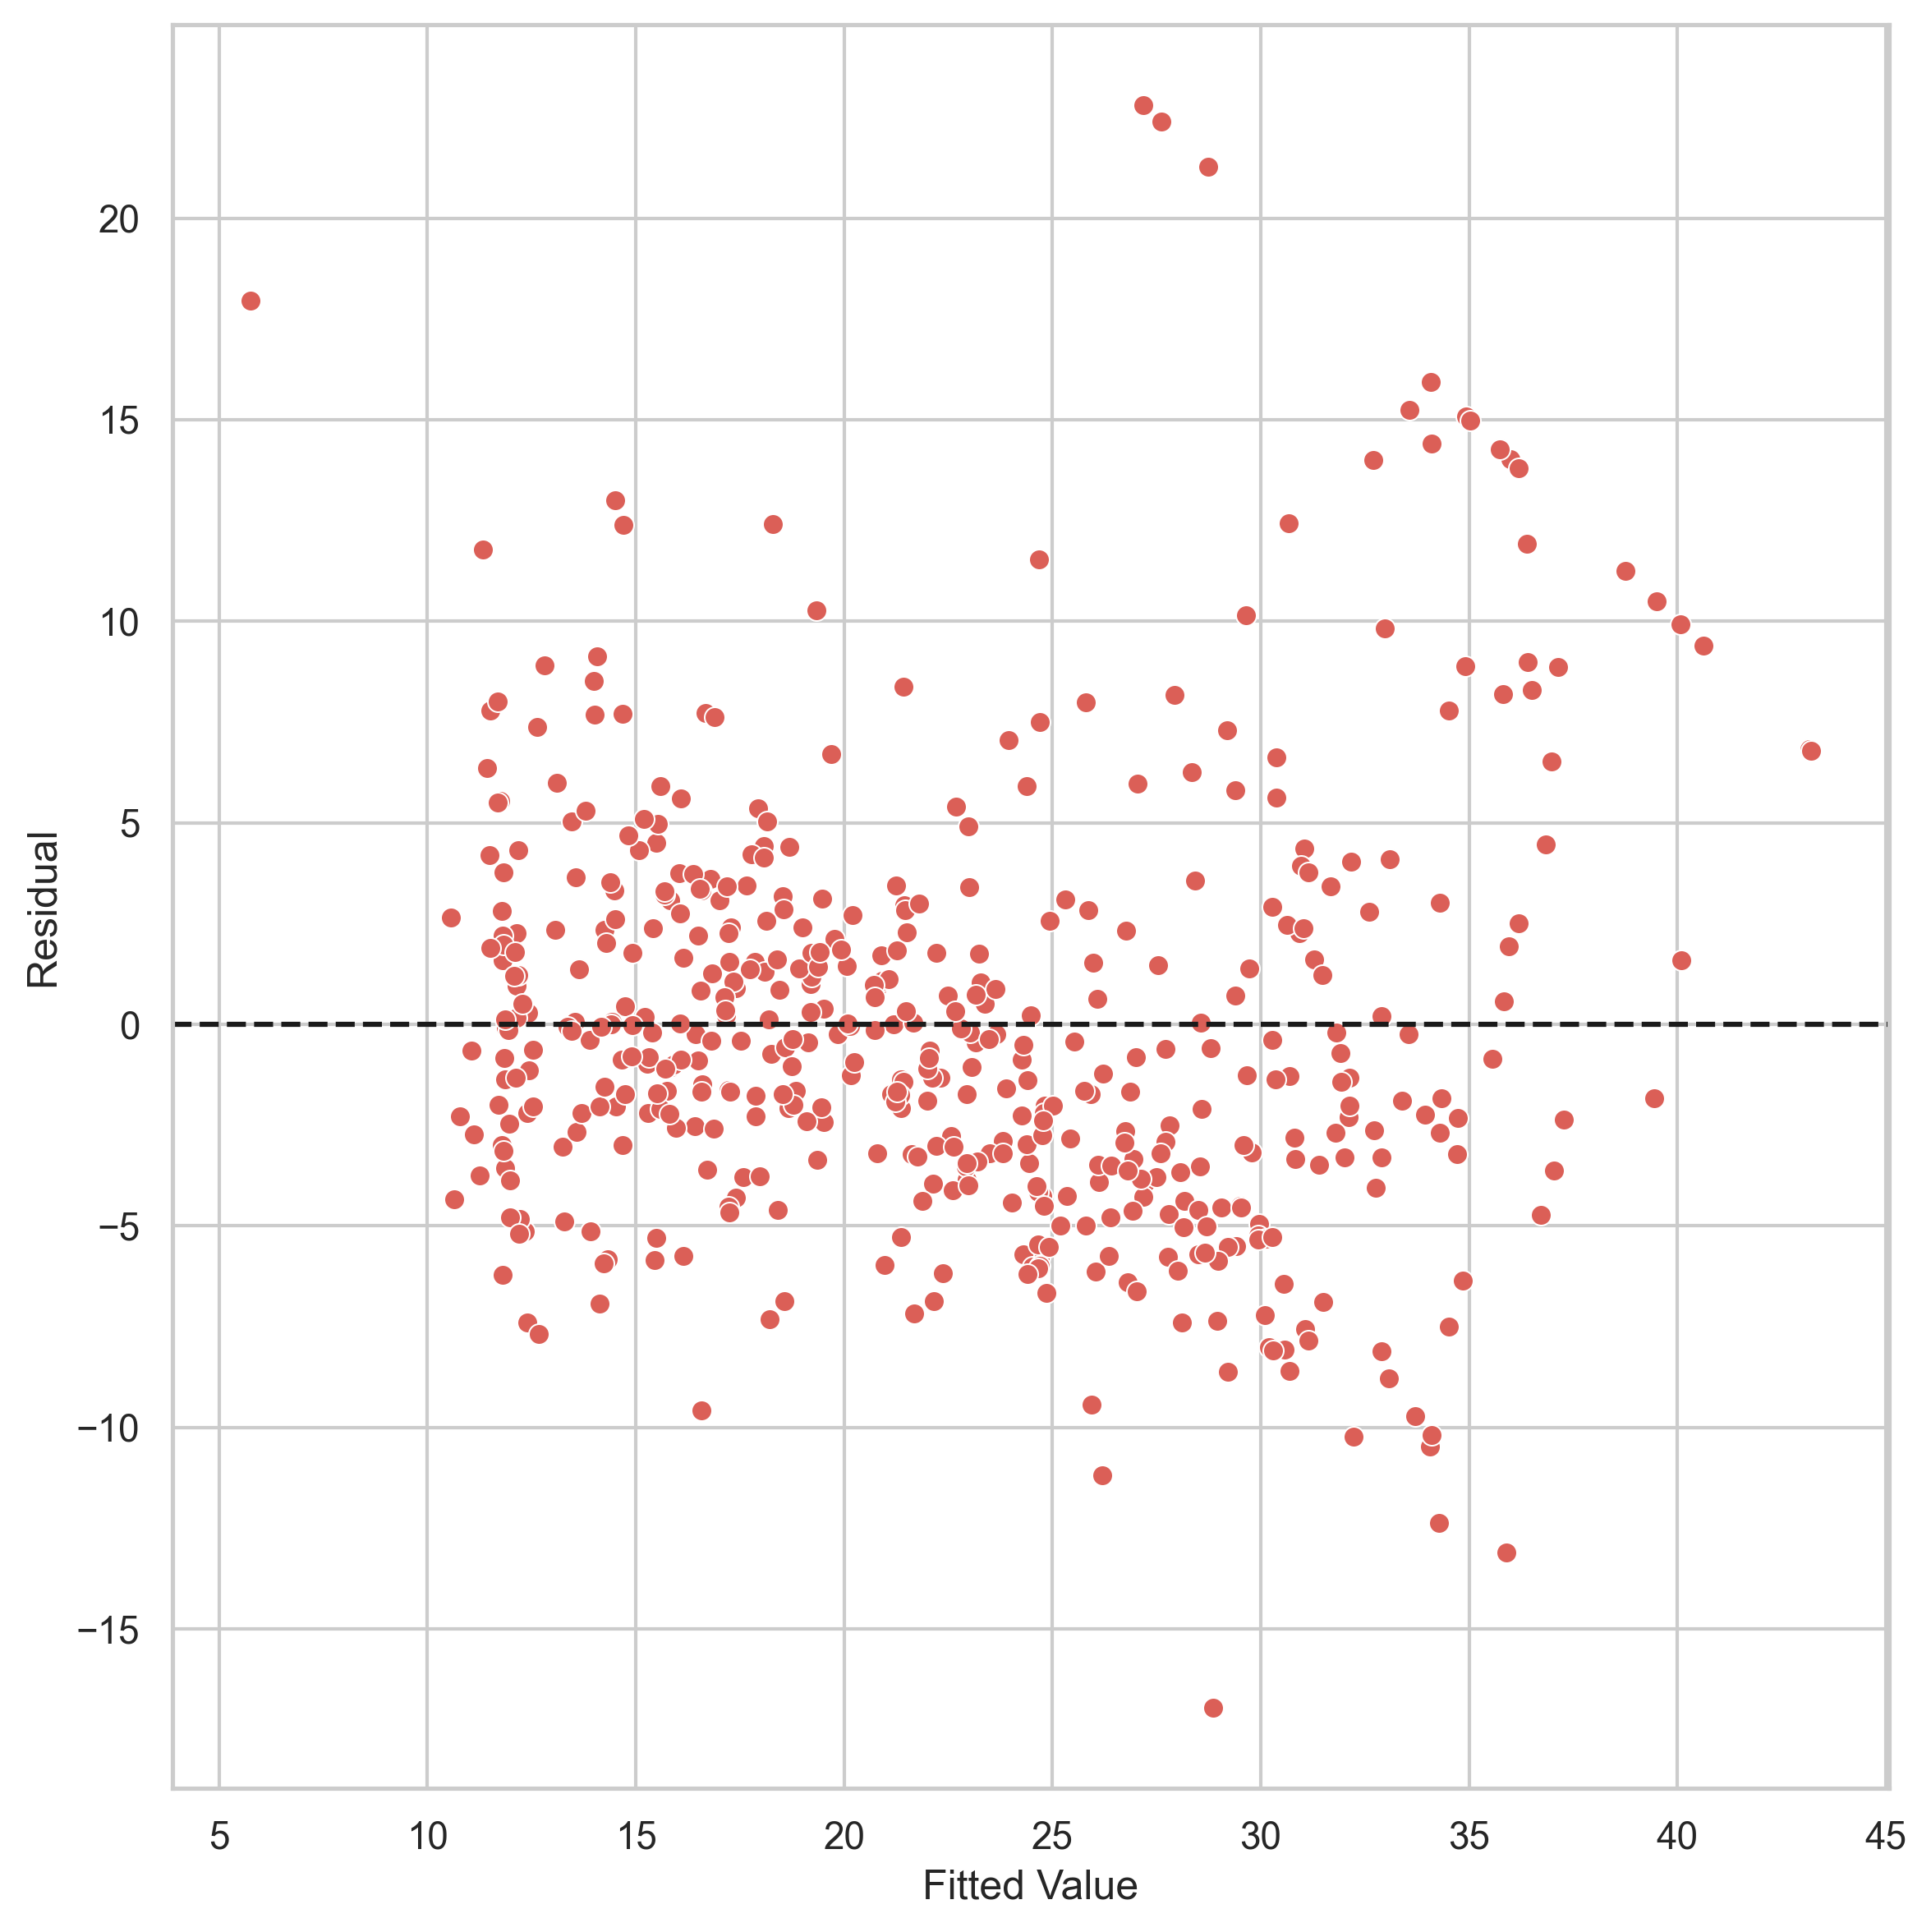

In [46]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=pd.DataFrame({
    'fittedvalues': mlr_result_3.fittedvalues,
    'resid': mlr_result_3.resid,
}), x='fittedvalues', y='resid')
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
fig.tight_layout()

### Qualitative Predictors

`Carseats` dataset includes qualitative predictors such as `ShelveLoc`, an indicator of the quality of the shelving location, and takes 3 values `Bad`, `Medium`, and `Good`.

In [47]:
carseats_df = load_data('Carseats')
carseats_df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

The model-matrix builder has created:
- `ShelveLoc[Good]` dummy variable that takes on a value of 1 if the shelving location is `good`, and 0 otherwise
- `ShelveLoc[Medium]` dummy variable that equals 1 if the shelving location is `medium`, and 0 otherwise

In [48]:
terms = list(carseats_df.columns.drop('Sales'))
terms += [('Income', 'Advertising'), ('Price', 'Age')]
y = carseats_df['Sales']
X = MS(terms).fit_transform(carseats_df)
mlr = sm.OLS(y, X)
mlr_result = mlr.fit()
summarize(mlr_result)

coef  std err       t  P>|t|
intercept           6.5756    1.009   6.519  0.000
CompPrice           0.0929    0.004  22.567  0.000
Income              0.0109    0.003   4.183  0.000
Advertising         0.0702    0.023   3.107  0.002
Population          0.0002    0.000   0.433  0.665
Price              -0.1008    0.007 -13.549  0.000
ShelveLoc[Good]     4.8487    0.153  31.724  0.000
ShelveLoc[Medium]   1.9533    0.126  15.531  0.000
Age                -0.0579    0.016  -3.633  0.000
Education          -0.0209    0.020  -1.063  0.288
Urban[Yes]          0.1402    0.112   1.247  0.213
US[Yes]            -0.1576    0.149  -1.058  0.291
Income:Advertising  0.0008    0.000   2.698  0.007
Price:Age           0.0001    0.000   0.801  0.424

The coefficient for `ShelveLoc[Good]` > 0 indicates that a `good` shelving location is associated with high sales (relative to a bad location). And `ShelveLoc[Medium]` has a smaller positive coefficient, indicating that a `medium` shelving location leads to lower sales than a `good` shelving location and higher sales than a `bad` shelving location.

# Applied

## Import

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import ProbPlot

from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize, poly

In [50]:
plt.rcParams['font.family'] = 'Avenir'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.dpi'] = 300

In [51]:
IMG_EXPORT_CONFIG = {
    'dpi': 500,
    'bbox_inches': 'tight',
    'pad_inches': 0.15,
}

In [52]:
sns.set_theme(style='whitegrid')
sns.set_palette('hls', 8)

## Code

In [53]:
def compute_model(y_name, X_name, data):
    y = data.loc[:, y_name]
    X = sm.add_constant(data.loc[:, X_name].values)
    model = sm.OLS(y, X).fit()
    
    return model, show_table(model, X_name)

In [54]:
def show_table(model, X_name):
    index_name = ['Intercept']
    if isinstance(X_name, str):
        index_name.append(X_name)
    elif isinstance(X_name, list):
        index_name = index_name + X_name
    
    df = pd.read_html(model.summary2().as_html())[1]
    colname = df.iloc[0]
    df = df.rename(columns=df.iloc[0]).drop(0).set_index(np.nan)
    df.index.name = None
    df.index = index_name
    
    return df

### Exercise 8 / 129

(a) Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summarize()` function to print the results. Comment on the output. For example:

1. Is there a relationship between the predictor and the response?
2. How strong is the relationship between the predictor and the response?
3. Is the relationship between the predictor and the response positive or negative?
4. What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?

In [55]:
auto_df = pd.read_csv('data/Auto.csv')
auto_df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [56]:
slr_df = pd.DataFrame({
    'mpg': pd.to_numeric(auto_df['mpg'], errors='coerce'),
    'horsepower': pd.to_numeric(auto_df['horsepower'], errors='coerce'),
}).dropna()
slr_result, slr_summary = compute_model('mpg', 'horsepower', slr_df)
slr_summary

Coef. Std.Err.         t   P>|t|   [0.025   0.975]
Intercept   39.9359   0.7175   55.6598  0.0000  38.5252  41.3465
horsepower  -0.1578   0.0064  -24.4891  0.0000  -0.1705  -0.1452

In [57]:
slr_result.summary().tables[0]

<class 'statsmodels.iolib.table.SimpleTable'>

In [58]:
design = MS(['horsepower'])
X = design.fit_transform(slr_df)
new_df = pd.DataFrame({'horsepower': [98]})
new_X = design.transform(new_df)
new_pred = slr_result.get_prediction(new_X)
print(f'Confidence Interval: {new_pred.conf_int(alpha=0.05)}')
print(f'Prediction Interval: {new_pred.conf_int(obs=True, alpha=0.05)}')

Confidence Interval: [[23.97307896 24.96107534]]
Prediction Interval: [[14.80939607 34.12475823]]


1. The small $p$-values indicates that there is a statistically significant relationship between the `horsepower` and `mpg`.
2. From the 2nd table, we see that `horsepower` explains 60.6% of the variance in `mpg`.
3. We can see that the coefficient of `horsepower` is a negative number, hence, the relationship between `horsepower` and `mpg` is negative.
4. The predicted `mpg` associated with a `horsepower` of 98 is: $= 39.9359 + 98 \times (-0.1578) = 24.4715$. <br>
    The 95% confidence interval is [-65.0684 -52.0335] and that of predicted interval is [-72.3933, -44.7087].

---

(b) Plot the response and the predictor in a new set of axes `ax`. Use the `ax.axline()` method or the `abline()` function defined in the lab to display the least squares regression line.

In [59]:
def add_linear_line(ax, m, b, *args, **kwargs):
    """ Add a line with slope m and intercept b to ax """
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

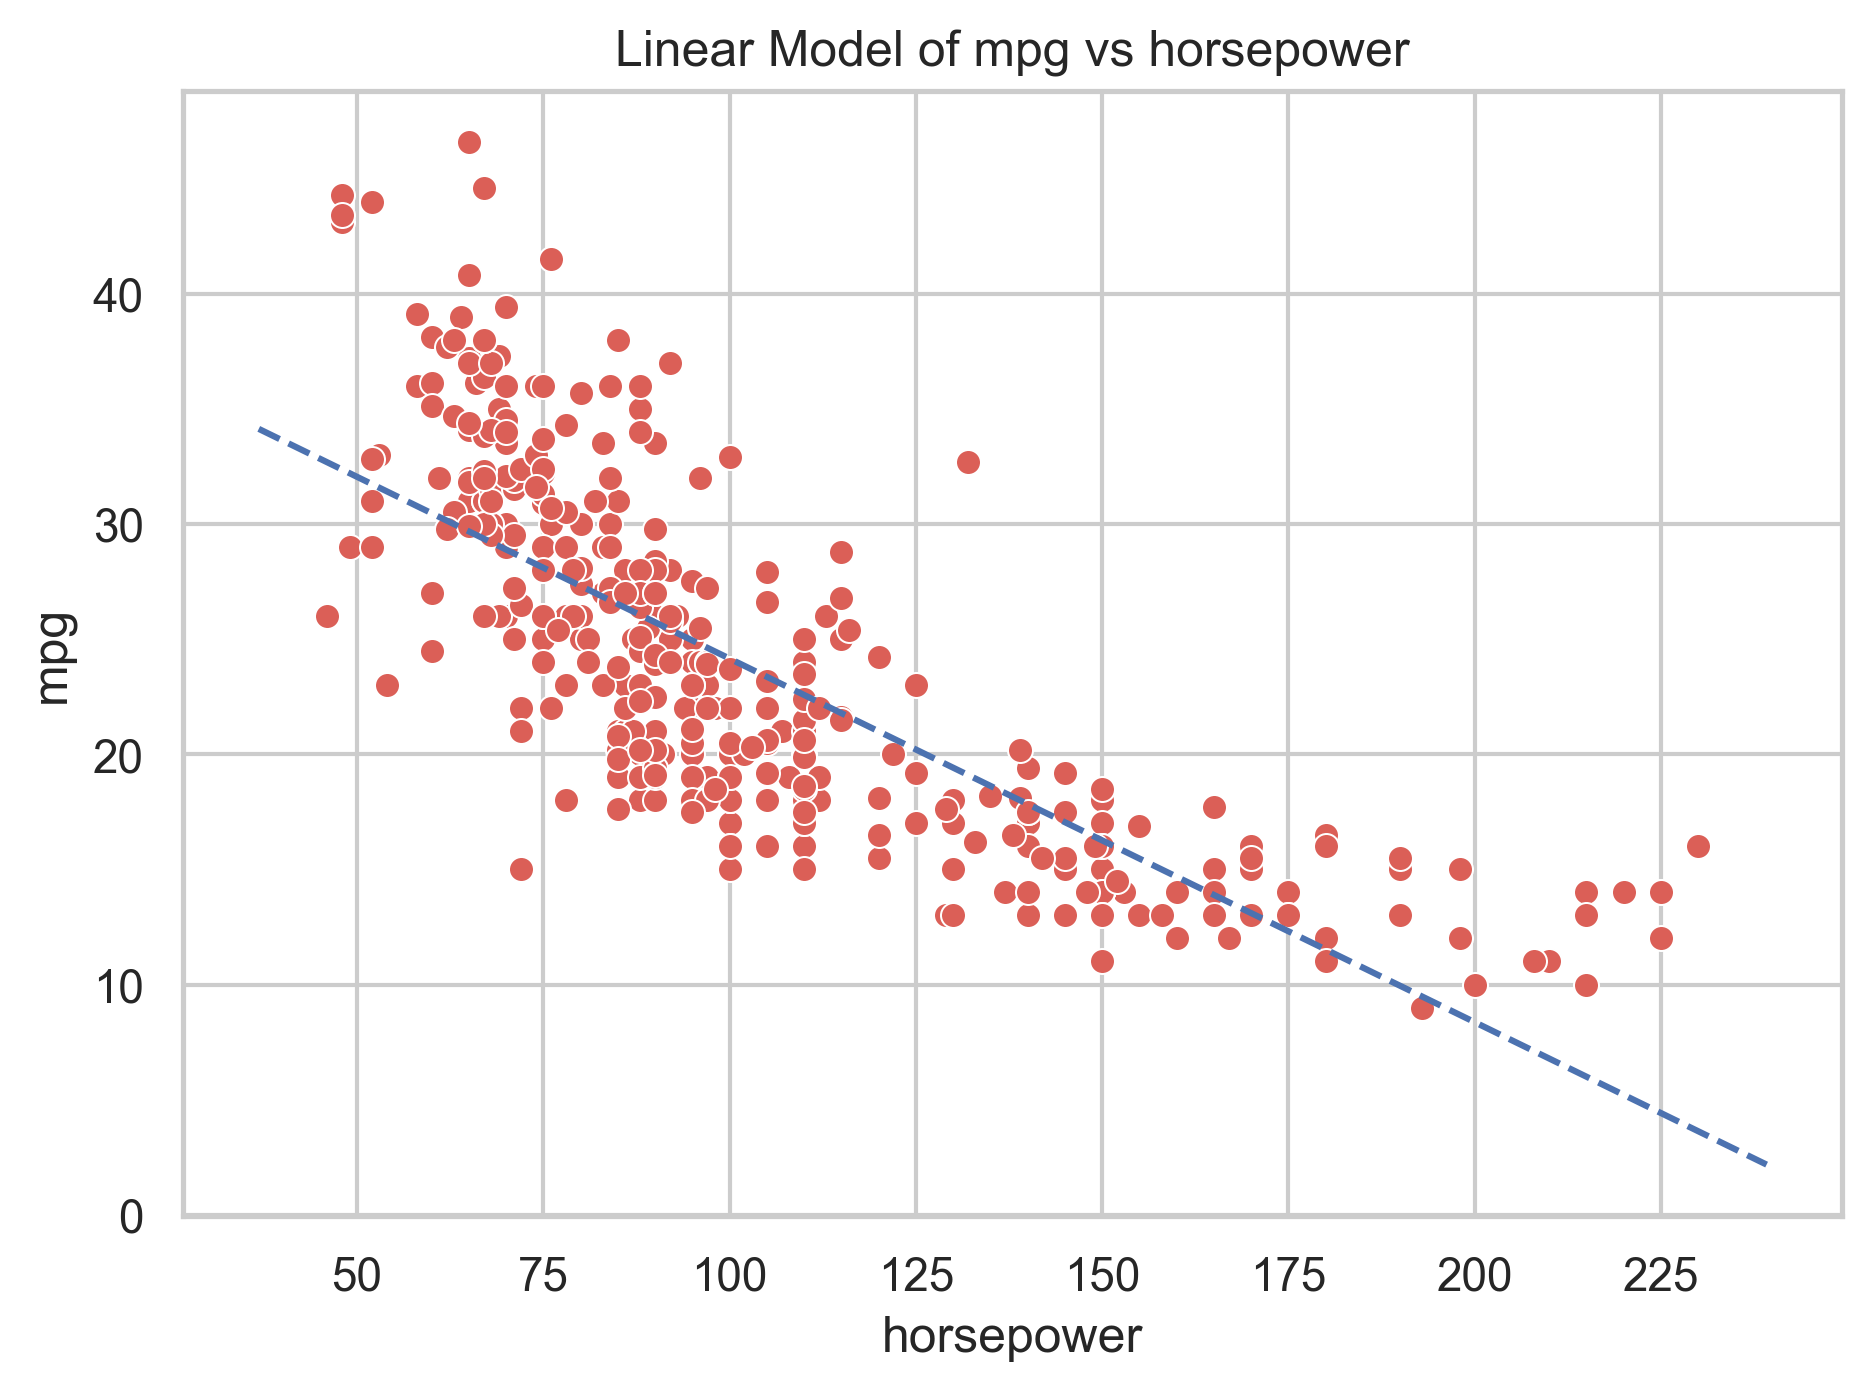

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(x='horsepower', y='mpg', data=slr_df, ax=ax)
add_linear_line(ax, slr_result.params[1], slr_result.params[0], 'b--')
ax.set_title('Linear Model of mpg vs horsepower')
fig.tight_layout()

---

(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

Cite: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/

In [61]:
def draw_diagnostic_plot(model_result, figsize=(12, 12)):
    top = 3
    
    student_resid = model_result.outlier_test()['student_resid']
    df = pd.DataFrame({
        'fittedvalues': model_result.fittedvalues,
        'resid': model_result.resid,
        'student_resid': student_resid,
        'sqrt_student_resid': np.sqrt(np.abs(student_resid)),
        'leverage': model_result.get_influence().hat_matrix_diag,
        'resid_studentized': model_result.get_influence().resid_studentized_internal,
    })
    df.reset_index(drop=True, inplace=True)

    fig, axes = plt.subplots(2, 2, figsize=figsize)

    sns.residplot(data=df, x='fittedvalues', y='resid', lowess=True, ax=axes[0, 0],
                  scatter_kws={'alpha': 0.5}, line_kws={'color': 'blue', 'lw': 1})
    calc = np.flip(np.argsort(np.abs(df['resid'])), 0)
    for r in calc[:top]:
        axes[0, 0].annotate(r, xy=(df['fittedvalues'][r], df['resid'][r]))
    axes[0, 0].set_xlabel('Fitted value')
    axes[0, 0].set_ylabel('Residual')
    axes[0, 0].set_title('Residual vs. Fitted value')

    qq_model = ProbPlot(df['resid_studentized'])
    qq_model.qqplot(line='45', alpha=0.5, lw=1, ax=axes[0, 1])
    calc = np.flip(np.argsort(np.abs(df['resid_studentized'])), 0)
    for i, r in enumerate(calc[:top]):
        y = df['resid_studentized'][r]
        x = np.flip(qq_model.theoretical_quantiles, 0)[i]
        x *= -1 if x*y < 0 else 1
        axes[0, 1].annotate(r, xy=(x, y))
    axes[0, 1].get_lines()[1].set_color('blue')
    axes[0, 1].set_xlabel('Theoretical Quantiles')
    axes[0, 1].set_ylabel('Standardized Residuals')
    axes[0, 1].set_title('Normal Q-Q')

    sns.scatterplot(data=df, x='fittedvalues', y='sqrt_student_resid', alpha=0.8, ax=axes[1, 0])
    sns.regplot(data=df, x='fittedvalues', y='sqrt_student_resid', ax=axes[1, 0],
                scatter=False, ci=False, lowess=True, line_kws={'color': 'blue', 'lw': 1})
    calc = np.flip(np.argsort(np.abs(df['sqrt_student_resid'])), 0)
    for r in calc[:top]:
        axes[1, 0].annotate(r, xy=(df['fittedvalues'][r], df['sqrt_student_resid'][r]))
    axes[1, 0].set_xlabel('Fitted value')
    axes[1, 0].set_ylabel('Squared studentized residual')
    axes[1, 0].set_title('Squared studentized residual vs. Fitted value')
    
    sns.scatterplot(data=df, x='leverage', y='student_resid', alpha=0.8, ax=axes[1, 1])
    sns.regplot(data=df, x='leverage', y='student_resid', ax=axes[1, 1],
                scatter=False, ci=False, lowess=True, line_kws={'color': 'blue', 'lw': 1})
    calc = np.flip(np.argsort(np.abs(df['student_resid'])), 0)
    for r in calc[:top]:
        axes[1, 1].annotate(r, xy=(df['leverage'][r], df['student_resid'][r]))
    axes[1, 1].set_ylim(min(df['student_resid'])-0.5, max(df['student_resid'])+0.5)
    axes[1, 1].set_xlabel('Studentized residual')
    axes[1, 1].set_ylabel('Leverage residual')
    axes[1, 1].set_title('Leverage residual vs. Studentized residual')

    params = len(model_result.params)
    x = np.linspace(0.001, max(df['leverage']), 50)
    y = np.sqrt((0.5 * params * (1 - x)) / x)
    plt.plot(x, y, label='Cook\'s distance', lw=1, ls='--', color='red')
    
    fig.tight_layout()

    return fig, axes

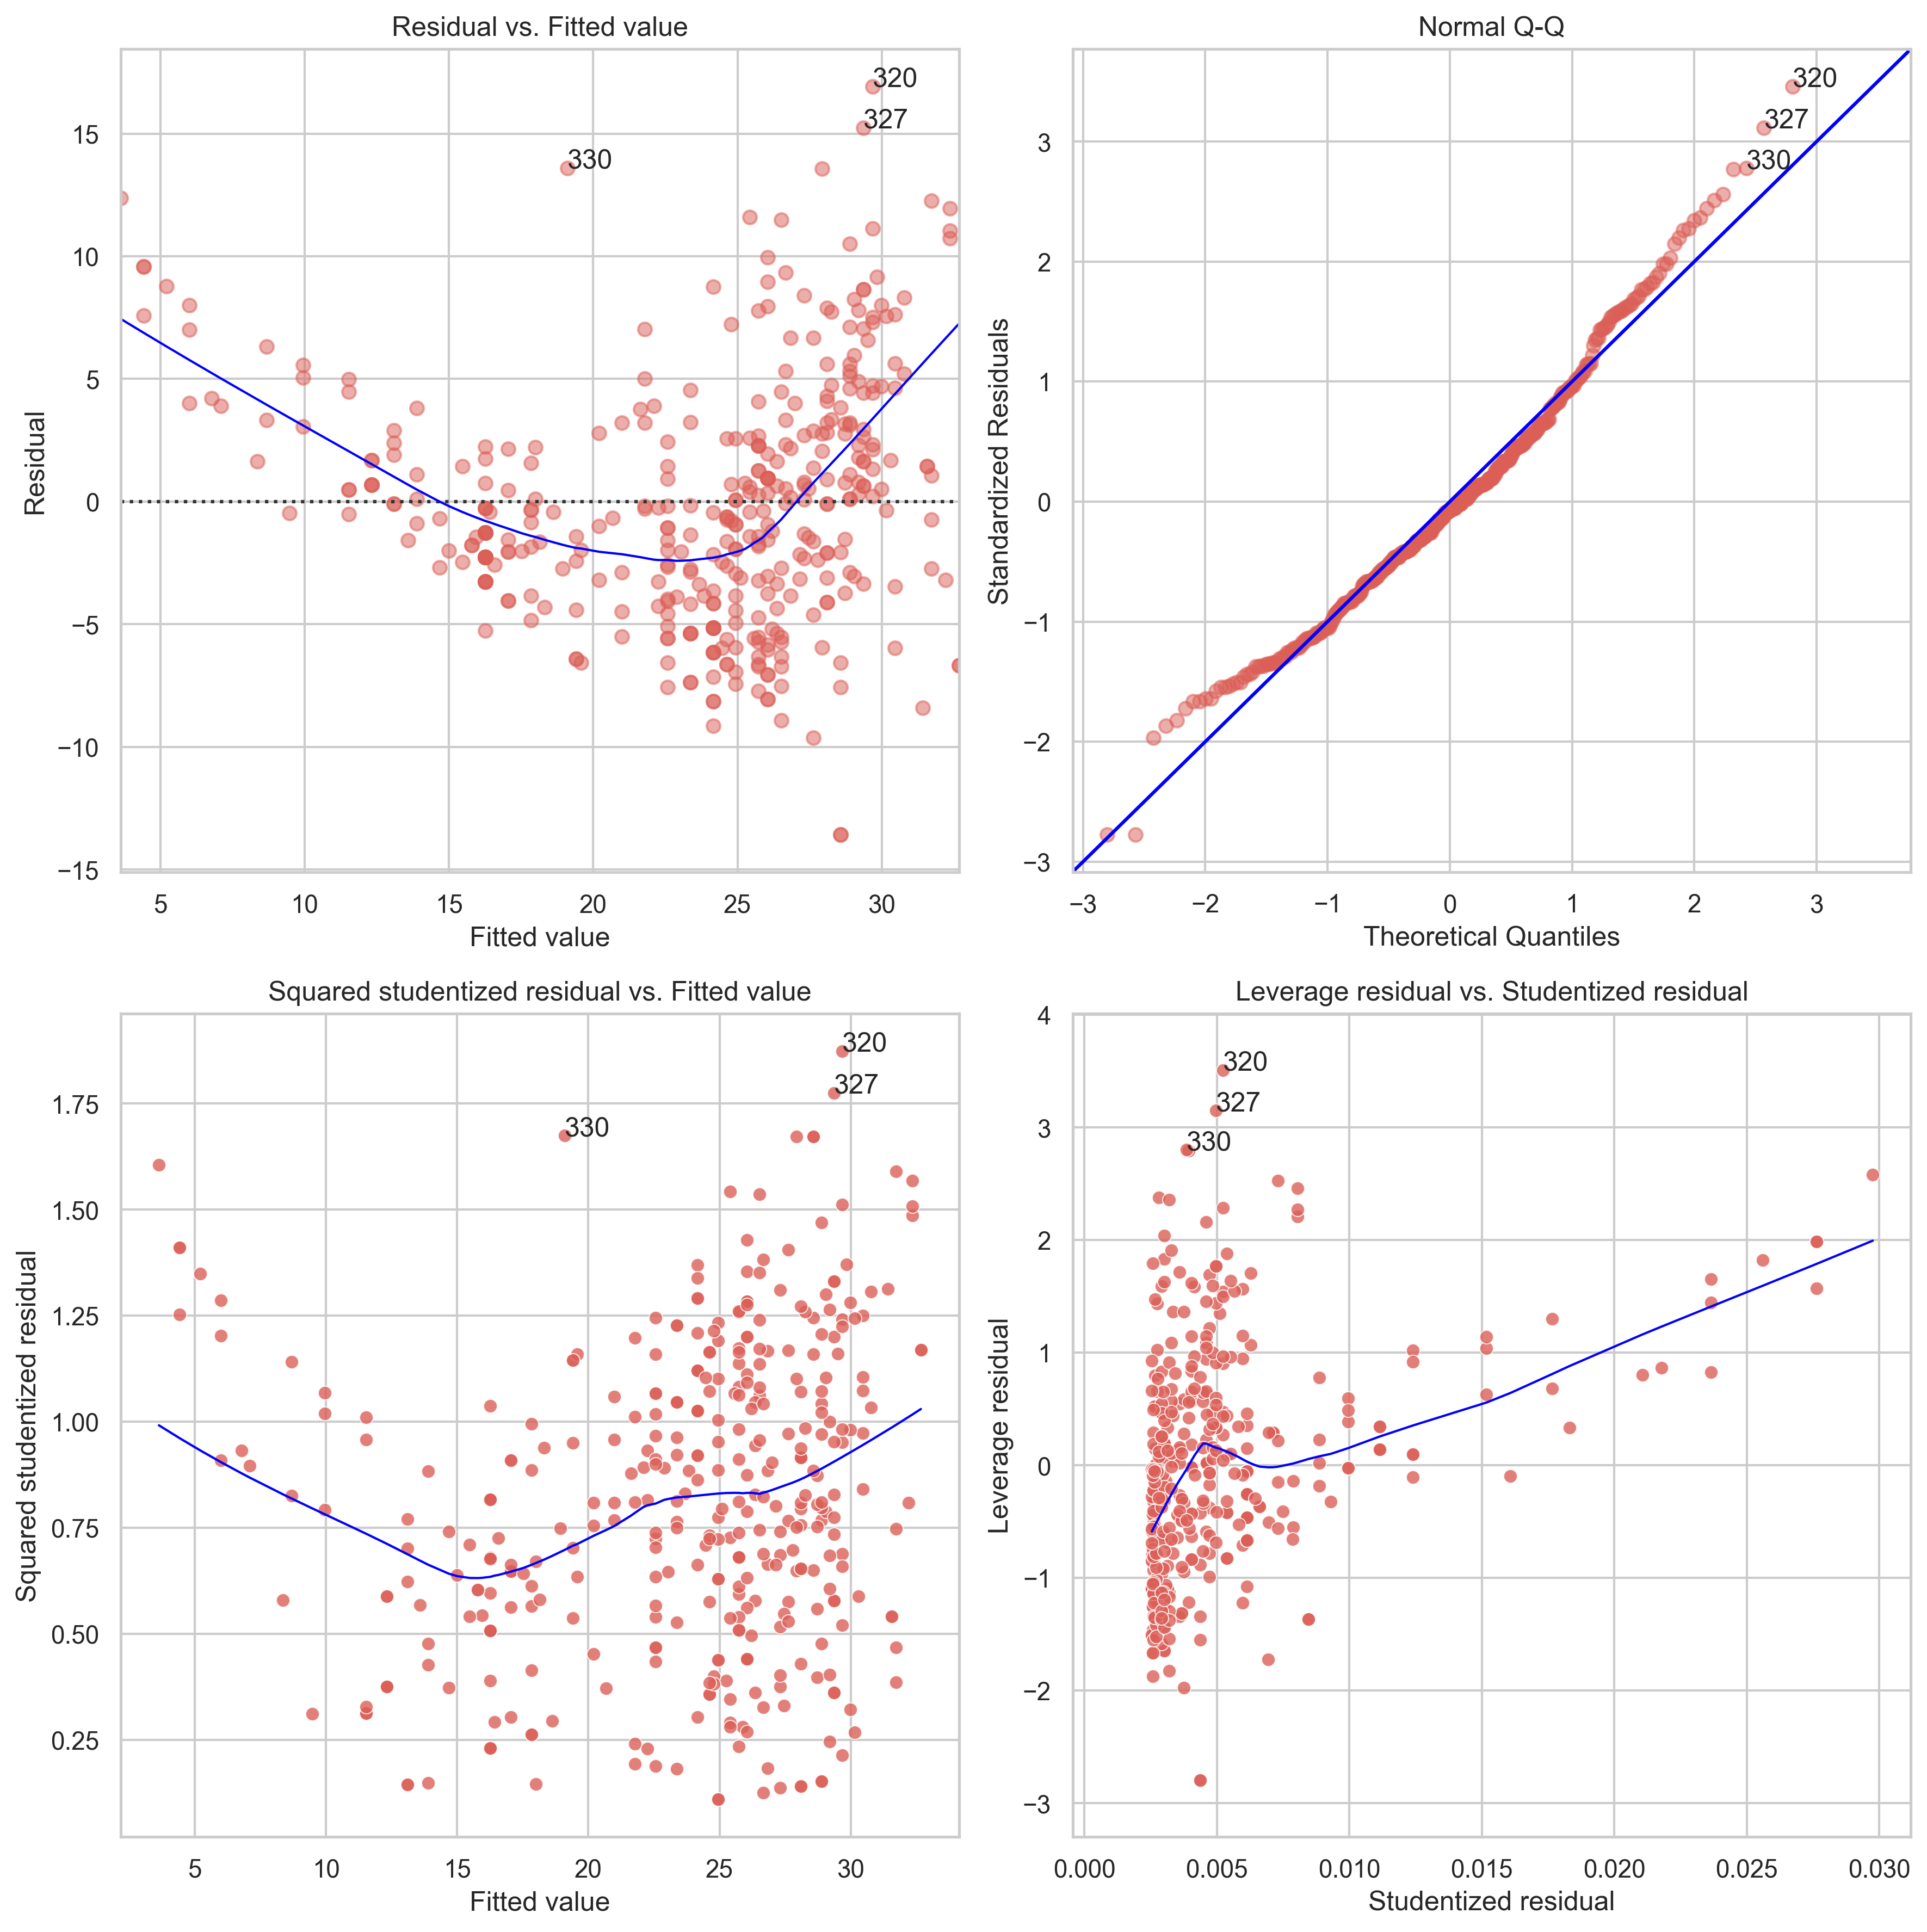

In [62]:
fig, axes = draw_diagnostic_plot(slr_result)

### Exercise 9 / 129

(a) Produce a scatterplot matrix which includes all of the variables in dataset `Auto`.

In [63]:
auto_df = pd.read_csv('data/Auto.csv')
auto_df.head()

mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [64]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')
auto_df['mpg'] = pd.to_numeric(auto_df['mpg'], errors='coerce')
auto_df.dropna(inplace=True)

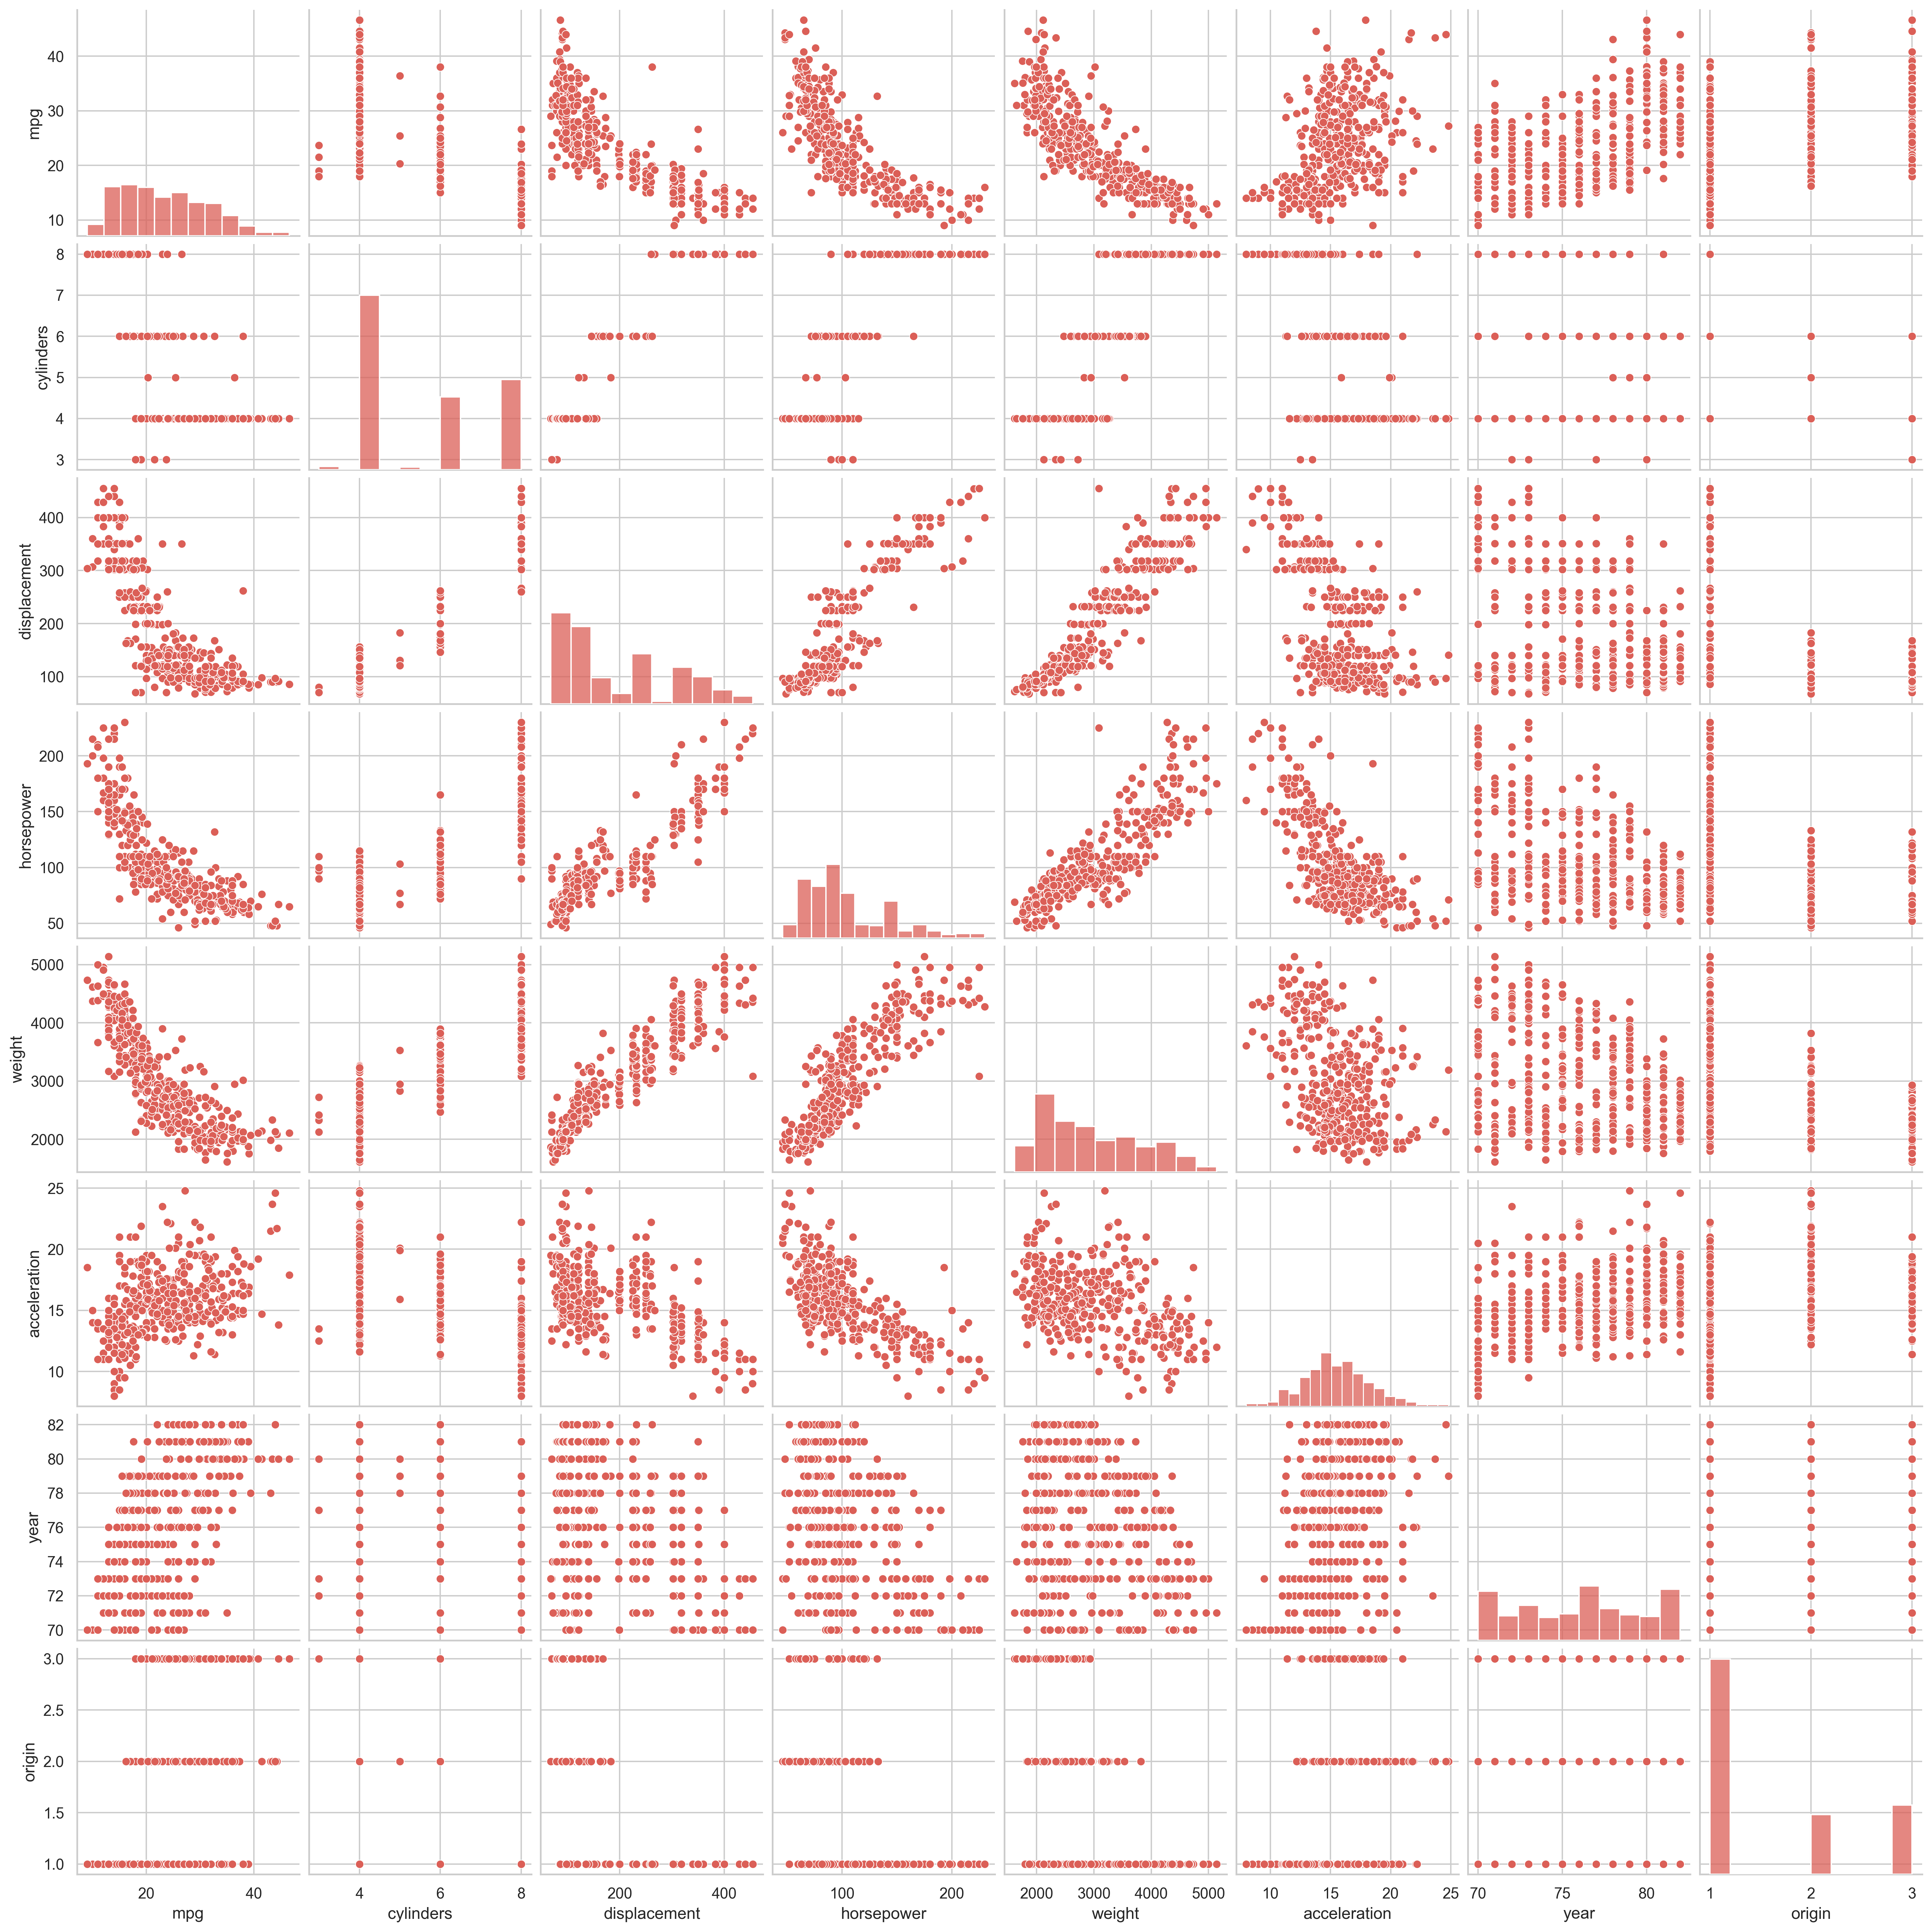

In [65]:
sns.pairplot(auto_df)

---

(b) Compute the matric of correlations between the variables using the `DataFrame.corr()` method.

In [66]:
corr = auto_df.corr(numeric_only=True)

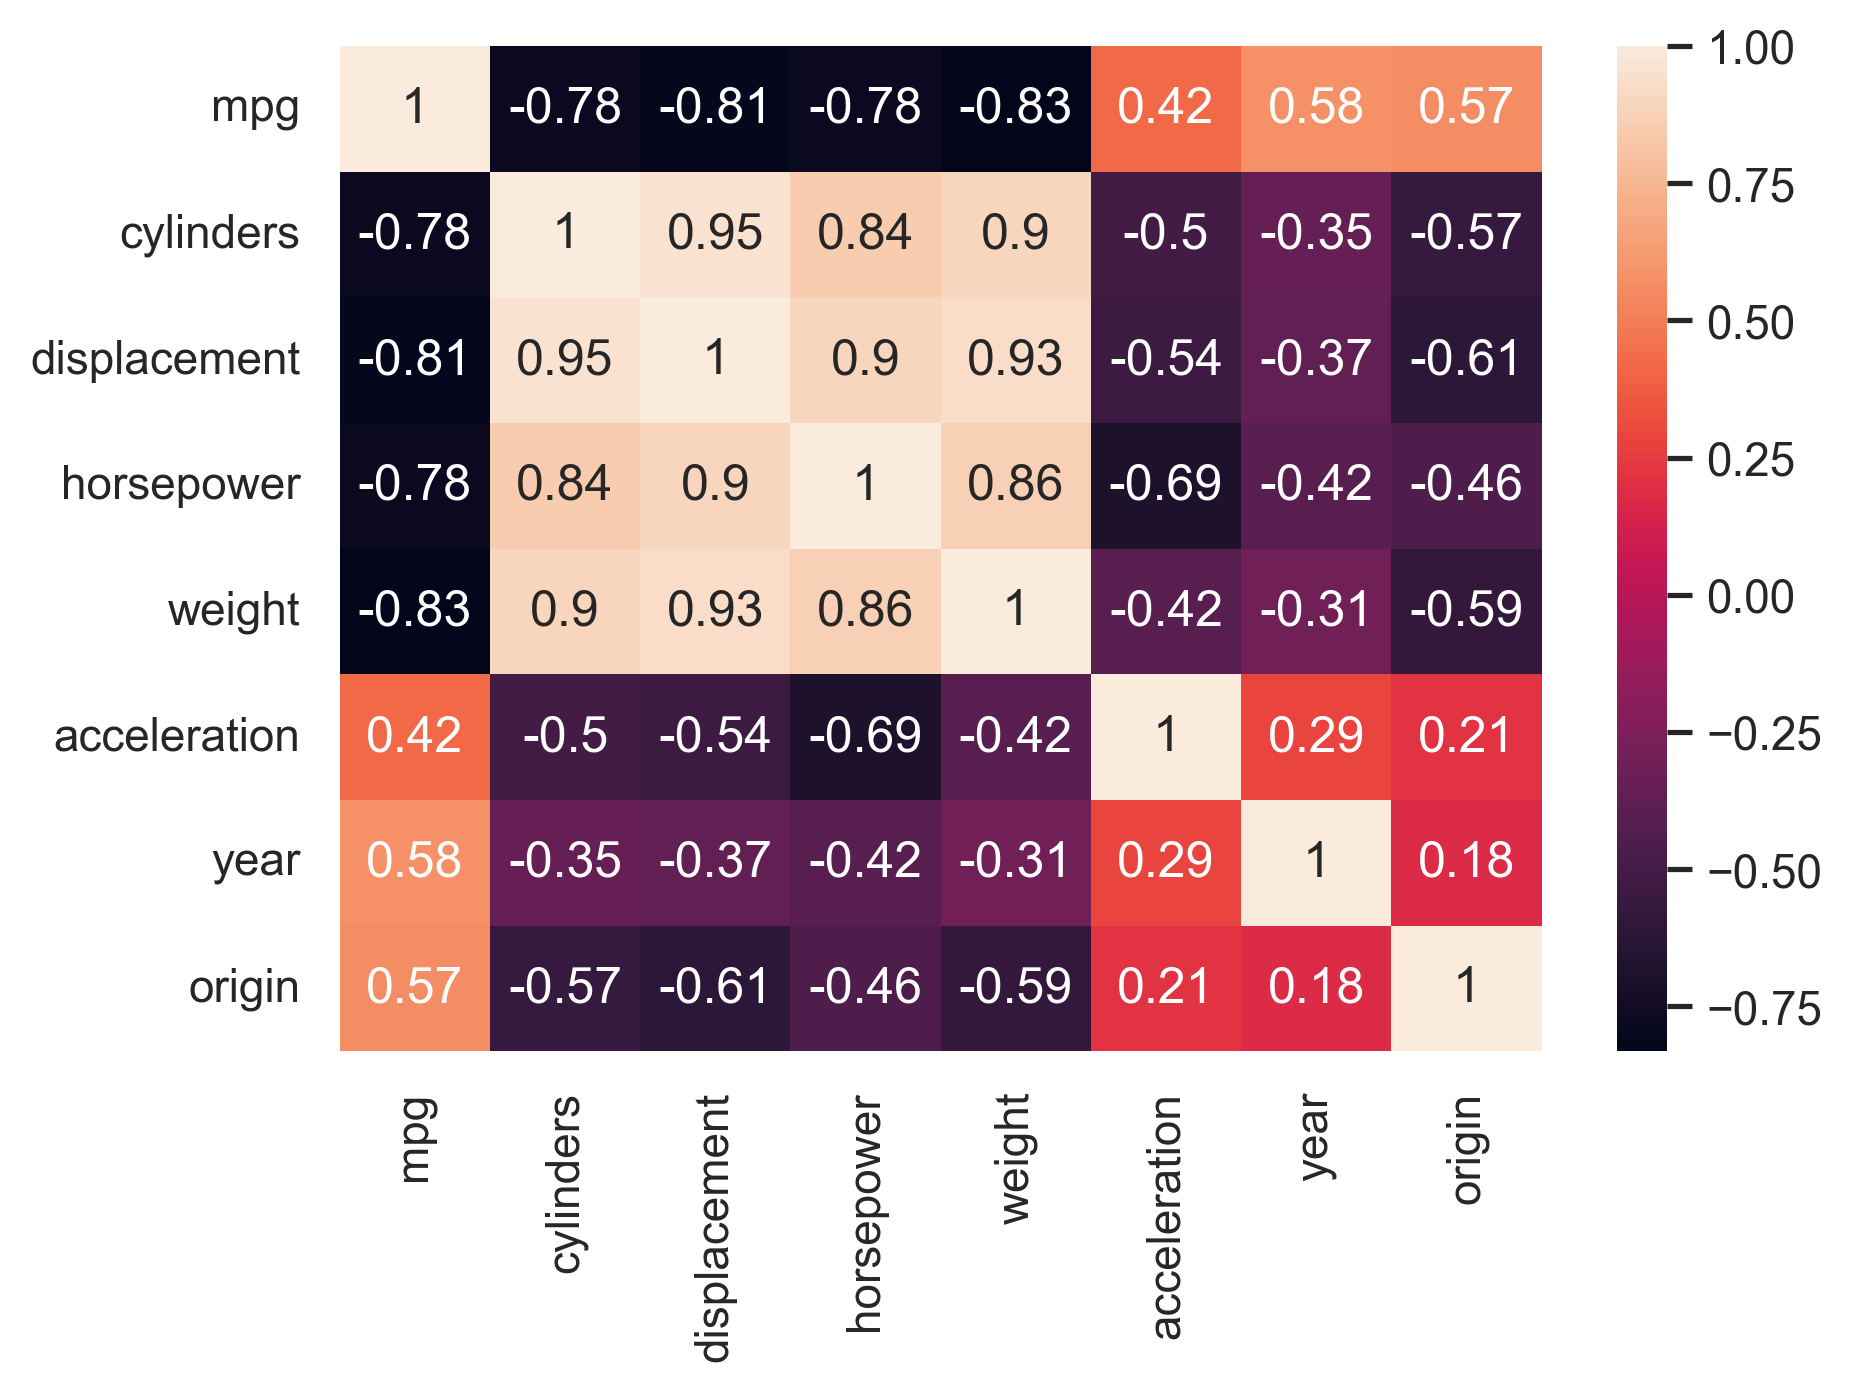

In [67]:
fig, ax = plt.subplots(1, 1)
sns.heatmap(corr, annot=True, cbar=True, ax=ax)
fig.tight_layout()

---

(c) Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summarize()` function to print the results. Comment on the output. For instance:

1. Is there a relationship between the predictors and the response? Use the `anova_lm` function from `statsmodels` to answer this question.
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the `year` variable suggest?

In [68]:
terms = list(auto_df.columns.drop(['name', 'mpg']))
y = auto_df['mpg']
X = MS(terms).fit_transform(auto_df)
mlr = sm.OLS(y, X)
mlr_result = mlr.fit()
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          2.04e-139
Time:                        10:37:40   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. From the 1st table, we see that $R^2$ = 82.1%, which means the response `mpg` can be explained by the predictors 82.1%.
2. From the 2nd table, we see that predictors with $p$-value < 0.05 (using column `P > |t|`) are: `displacement`, `weight`, `year`, and `origin`.
3. The coefficient for `year` is positive, which suggests that recently made cars have higher `mpg`.

---

(d) Produce some of diagnotic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

*Notes*: High leverage points are points with an unusual value for $x_i$.

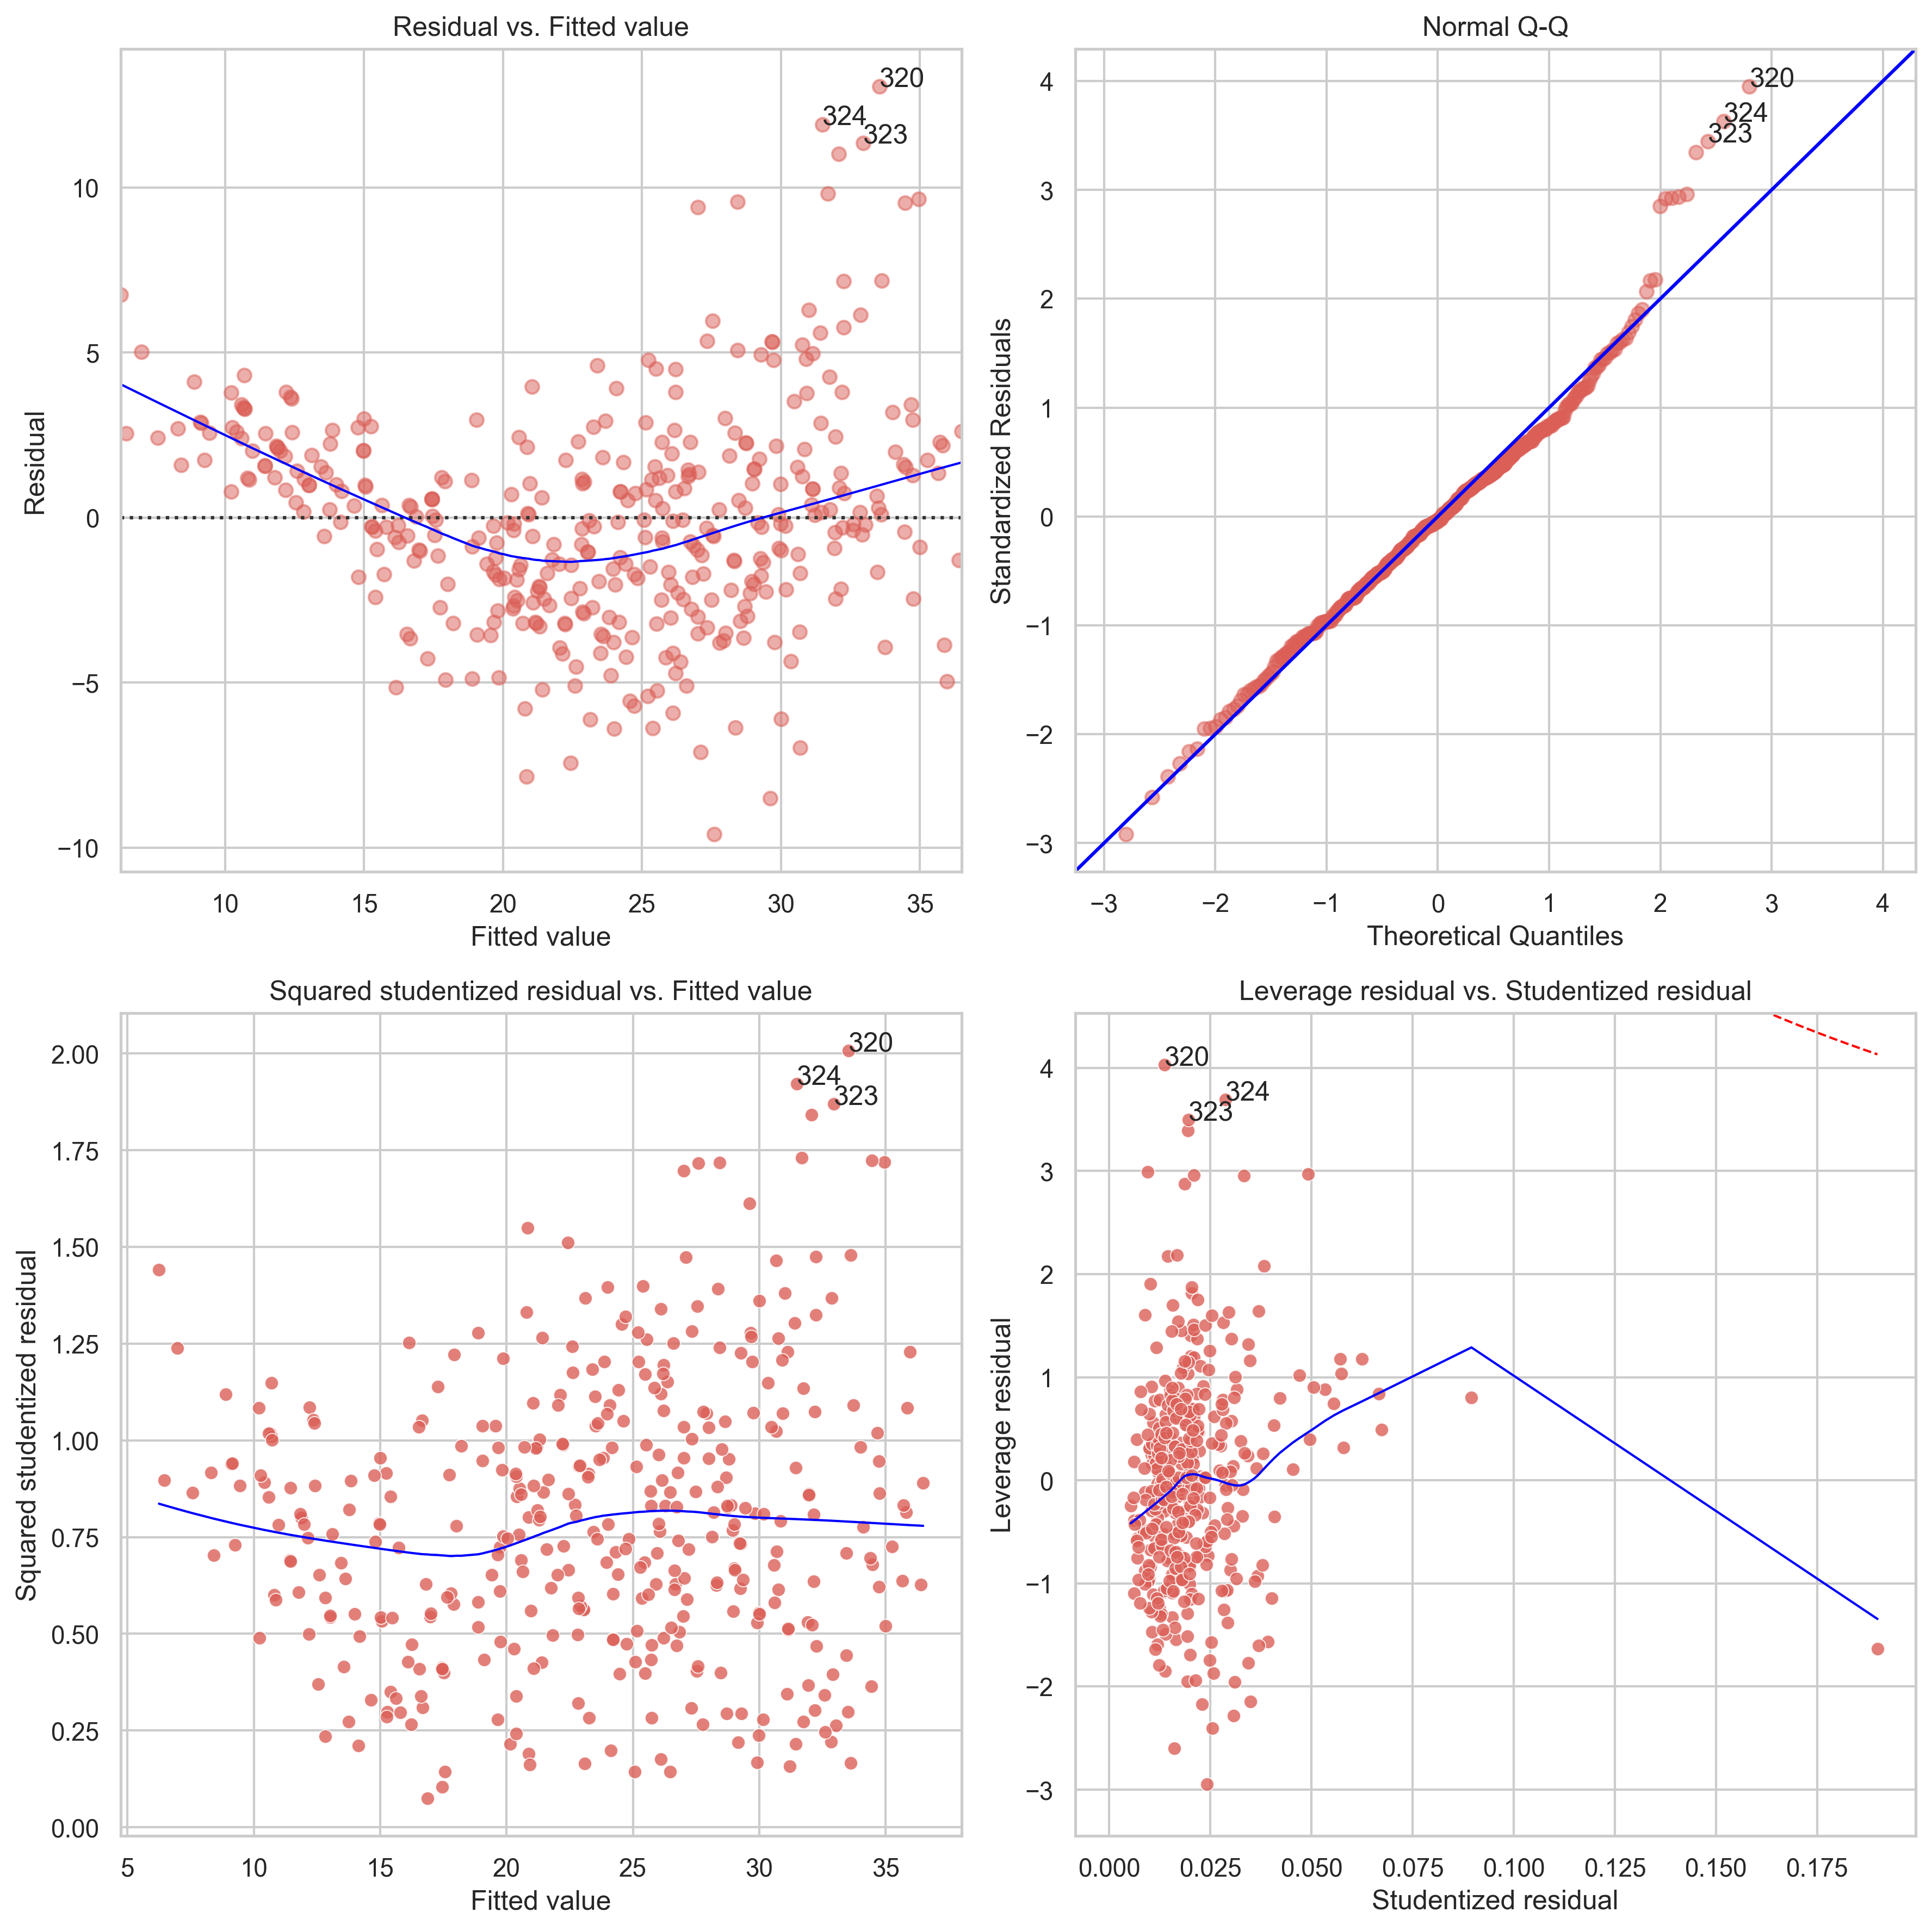

In [69]:
fig, axes = draw_diagnostic_plot(mlr_result)

---

(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

In [70]:
terms = list(auto_df.columns.drop(['name', 'mpg']))
interaction_terms = [(terms[i], terms[j]) for i in range(len(terms)-1) for j in range(i+1, len(terms))]

y = auto_df['mpg']
interact_X = MS(terms + interaction_terms).fit_transform(auto_df)
mlr = sm.OLS(y, interact_X)
mlr_result = mlr.fit()
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Fri, 12 Jul 2024   Prob (F-statistic):          4.01e-155
Time:                        10:37:42   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

From 2nd table, interaction terms with $p$-value < 0.05 are: `displacement:year`, `acceleration:year`, and `acceleration:origin`.

In [71]:
terms = ['displacement', 'weight', 'year', 'origin']
interaction_terms = [('displacement', 'year'), ('acceleration', 'year'), ('acceleration', 'origin')]
y = auto_df['mpg']

non_interact_X = MS(terms).fit_transform(auto_df)
non_interact_mlr = sm.OLS(y, non_interact_X)
non_interact_mlr_result = non_interact_mlr.fit()

interact_X = MS(terms + interaction_terms).fit_transform(auto_df)
interact_mlr = sm.OLS(y, interact_X)
interact_mlr_result = interact_mlr.fit()

print(f'Without Interaction: {non_interact_mlr_result.rsquared}')
print(f'With Interaction   : {interact_mlr_result.rsquared}')

Without Interaction: 0.8180977417246628
With Interaction   : 0.8495594574249541


---

(f) Try a few different transformations of the variables, such as $\log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings.

In [72]:
terms = list(auto_df.columns.drop(['name', 'mpg']))
y = auto_df['mpg']
X = MS(terms).fit_transform(auto_df)
X = np.sqrt(X[terms])
mlr = sm.OLS(y, X)
mlr_result = mlr.fit()
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3034.
Date:                Fri, 12 Jul 2024   Prob (F-statistic):                        0.00
Time:                        10:37:42   Log-Likelihood:                         -1023.9
No. Observations:                 392   AIC:                                      2062.
Df Residuals:                     385   BIC:                                      2090.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -1.5814      1.572     -1.006      0.315      -4.673       1.510
displacement     0.2658      0.238      1.118      0.264      -0.201       0.733
horsepower      -1.5951      0.278     -5.728      0.000      -2.143      -1.048
weight          -0.5188      0.079     -6.531      0.000      -0.675      -0.363
acceleration    -2.9484      0.764     -3.861      0.000      -4.450      -1.447
year             8.7030      0.428     20.356      0.000       7.862       9.544
origin           2.7579      0.790      3.492      0.001       1.205       4.311
==============================================================================
Omnibus:                       56.026   Durbin-Watson:                   1.304
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.979
Skew:                           0.769   Prob(JB):                     3.97e-26
Kurtosis:                       5.190   Cond. No.                         553.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

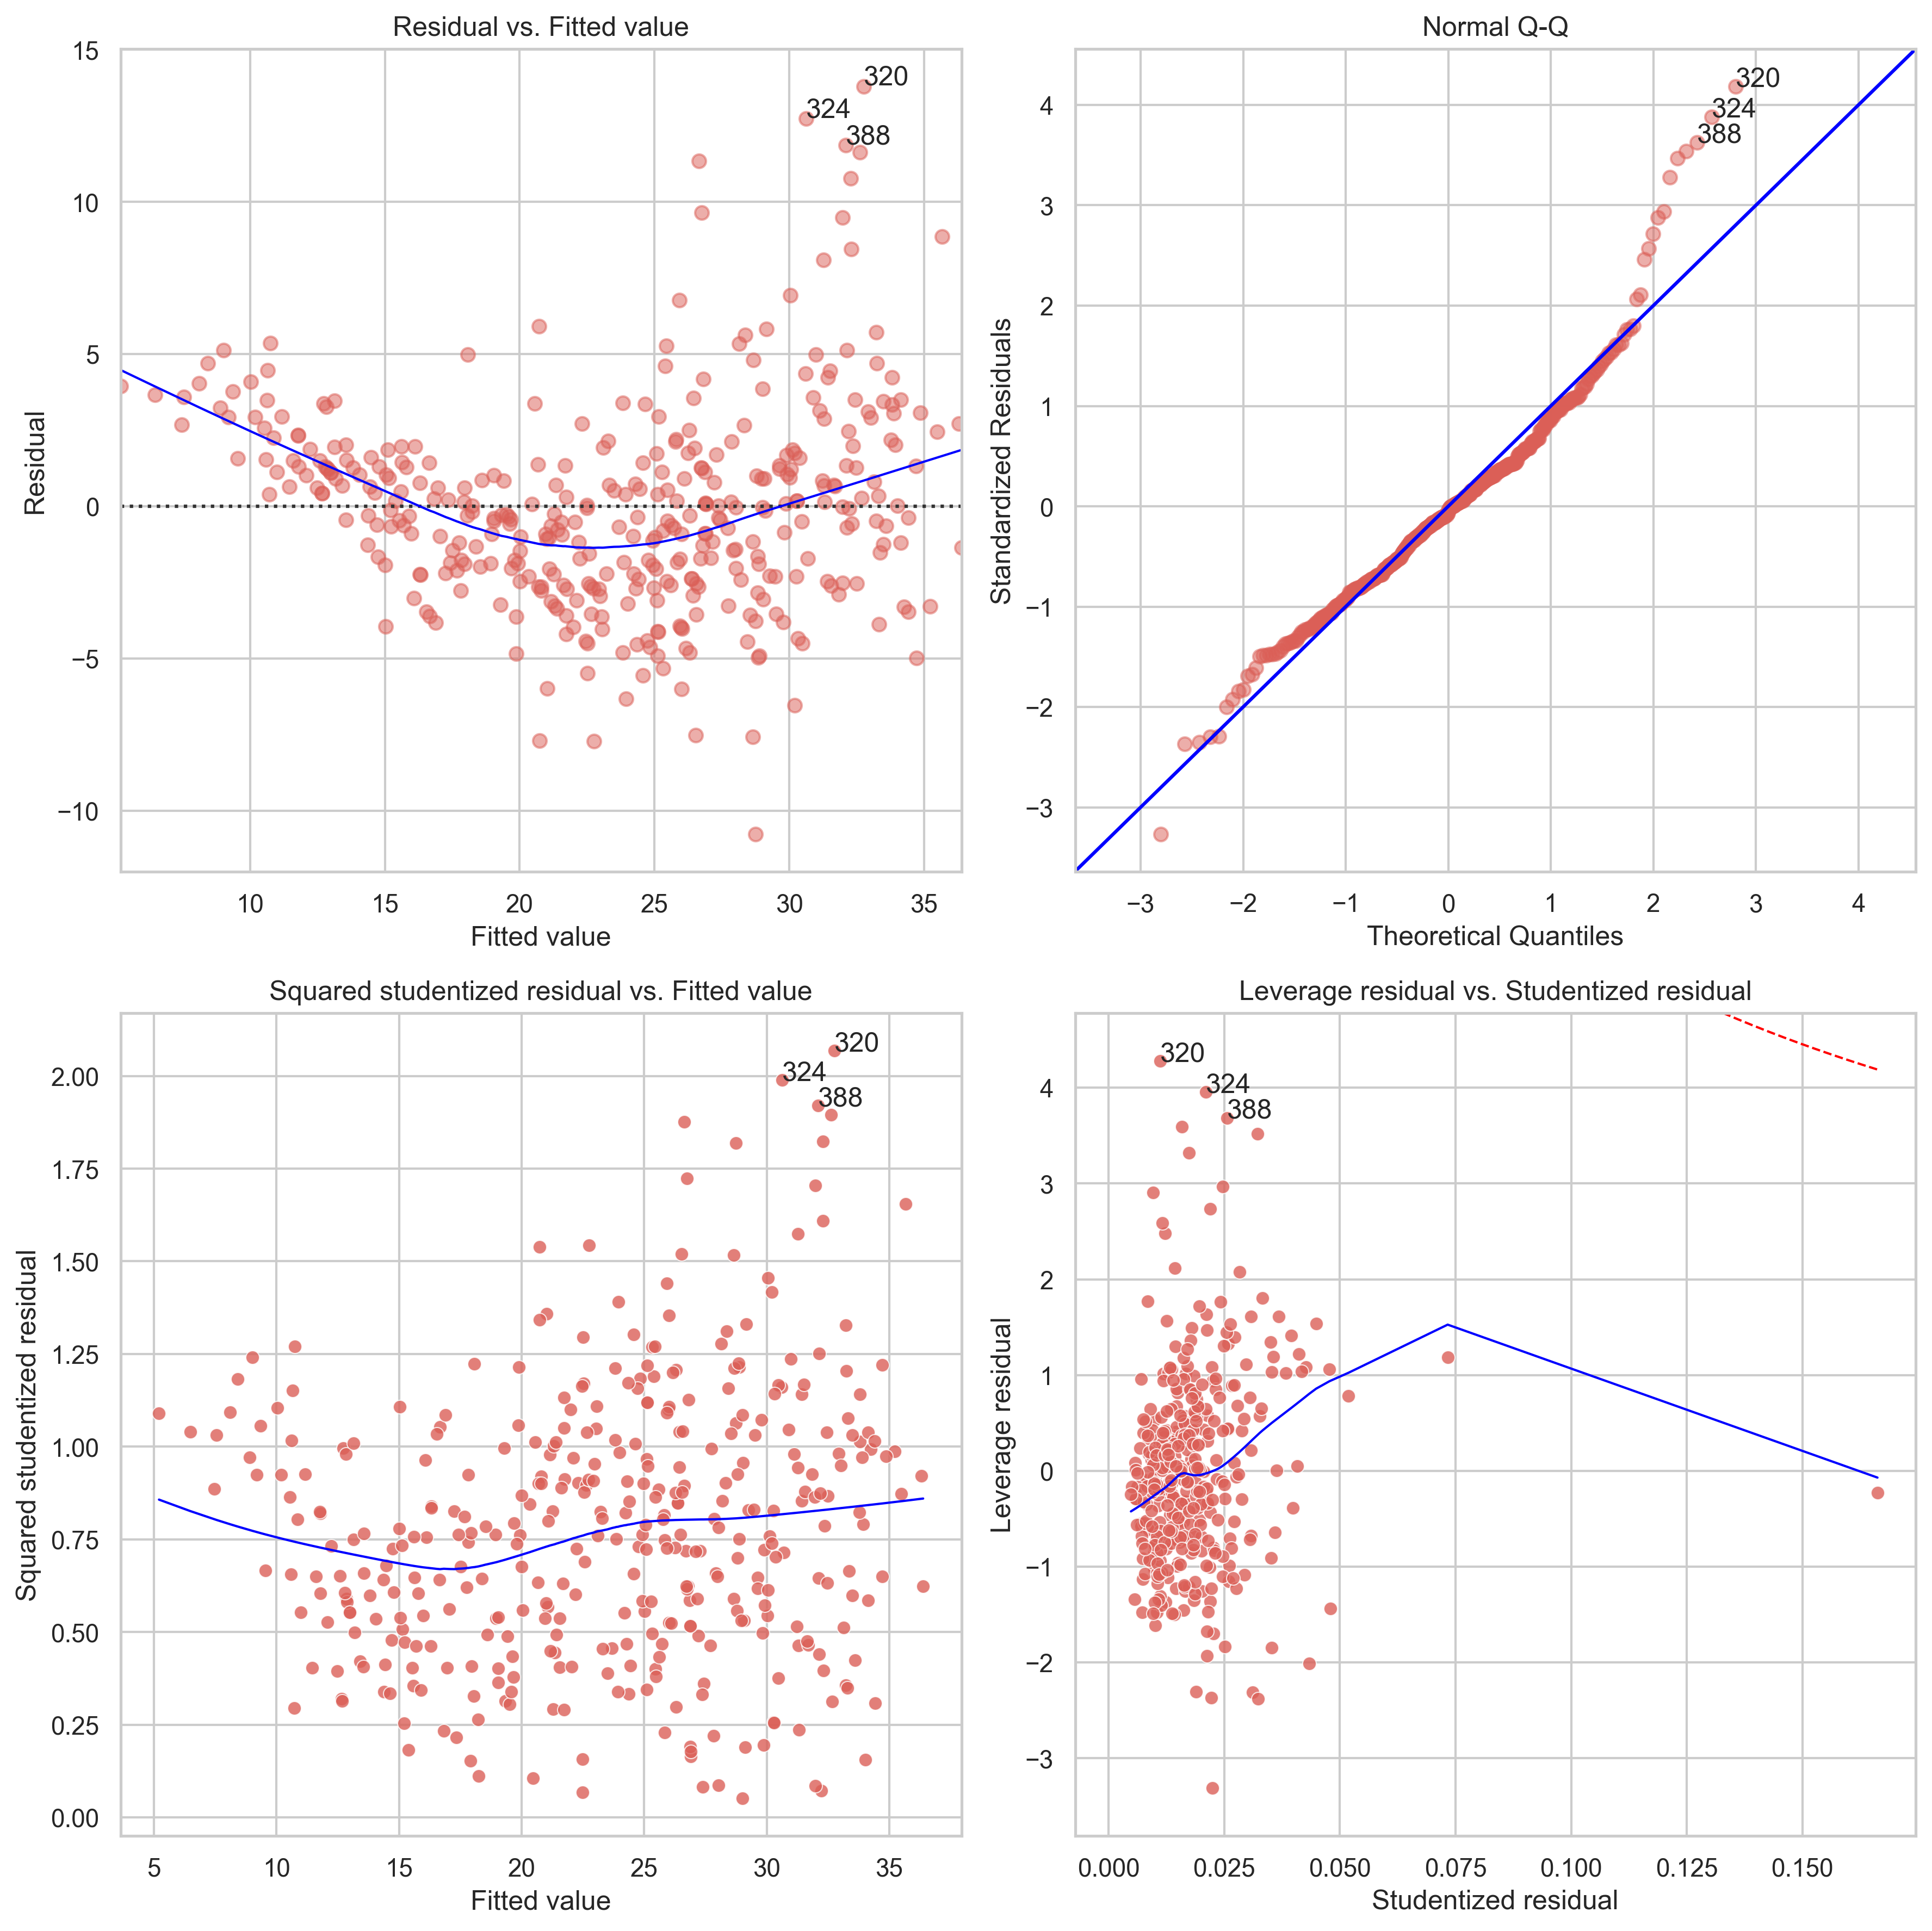

In [73]:
fig, axes = draw_diagnostic_plot(mlr_result)

### Exercise 10 / 130

(a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US` for `Carseats` dataset.

In [74]:
carseats_df = load_data('Carseats')
carseats_df.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [75]:
y = carseats_df['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(carseats_df)
mlr = sm.OLS(y, X)
mlr_result = mlr.fit()
mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           2.39e-23
Time:                        10:37:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

(b) Provide an interpretation of each coefficient in the model. Be careful, some of the variables in the model are qualitative!

From 2nd table, we see that only `Price` and `US` has $p$-value < 0.05, while `Urban` has little to no effect.
- `Price`: an increase in price of $1 results in an average decrease in unit `sales` of 0.0545.
- `US`: a US state will increase the average sales by 1.2006.

---

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

We encode the binary qualitative predictors `US` and `Urban` as follows:

$$\hspace{0.6cm}
\begin{flalign}
Y = \beta_0 + \beta_{\text{US}}x_i + \epsilon_i = \begin{cases}
\beta_0 + \beta_{\text{US}}x_{\text{Urban}} + \epsilon_i & \text{ if } i\text{th house is in US} \\
\beta_0 + \epsilon_i & \text{ if } i\text{th house is not in US} \\
\end{cases} &&
\end{flalign}$$

$$\hspace{0.6cm}
\begin{flalign}
Y = \beta_0 + \beta_{\text{Urban}}x_i + \epsilon_i = \begin{cases}
\beta_0 + \beta_{\text{Urban}}x_{\text{Urban}} + \epsilon_i & \text{ if } i\text{th house is in Urban area} \\
\beta_0 + \epsilon_i & \text{ if } i\text{th house is not in Urban area} \\
\end{cases} &&
\end{flalign}$$

$$\begin{flalign}
\Rightarrow Y = \beta_0 + \beta_{\text{Price}}X_{\text{Price}} +
\beta_{\text{US}}X_{\text{US}} + \beta_{\text{Urban}}X_{\text{Urban}} + \epsilon &&
\end{flalign}$$

---

(d) For which of the predictors can you reject the null hypothesis?

As what has been explained previously, predictor `Urban` can have its null hypothesis rejected since its $p$-value > 0.05.

---

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [76]:
y = carseats_df['Sales']
X = MS(['Price', 'US']).fit_transform(carseats_df)
simple_mlr = sm.OLS(y, X)
simple_mlr_result = simple_mlr.fit()
simple_mlr_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Fri, 12 Jul 2024   Prob (F-statistic):           2.66e-24
Time:                        10:37:43   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

---

(f) How well do the models in (a) and (e) fit the data?

- Both models have $R^2$ value to be 23.9%, which indicates that there is still a significant amount of unexplained variance.
- Model with `Urban` has a lower $F$-statistic than that of model without `Urban` (41.52 < 62.43). Both values suggest there is not a significant relationship between `Price` the subsequent predictors.

---

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [77]:
simple_mlr_result.conf_int(alpha=0.05)

0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766

---

(h) Is there evidence of outliers or high leverage observations in the model from (e)?

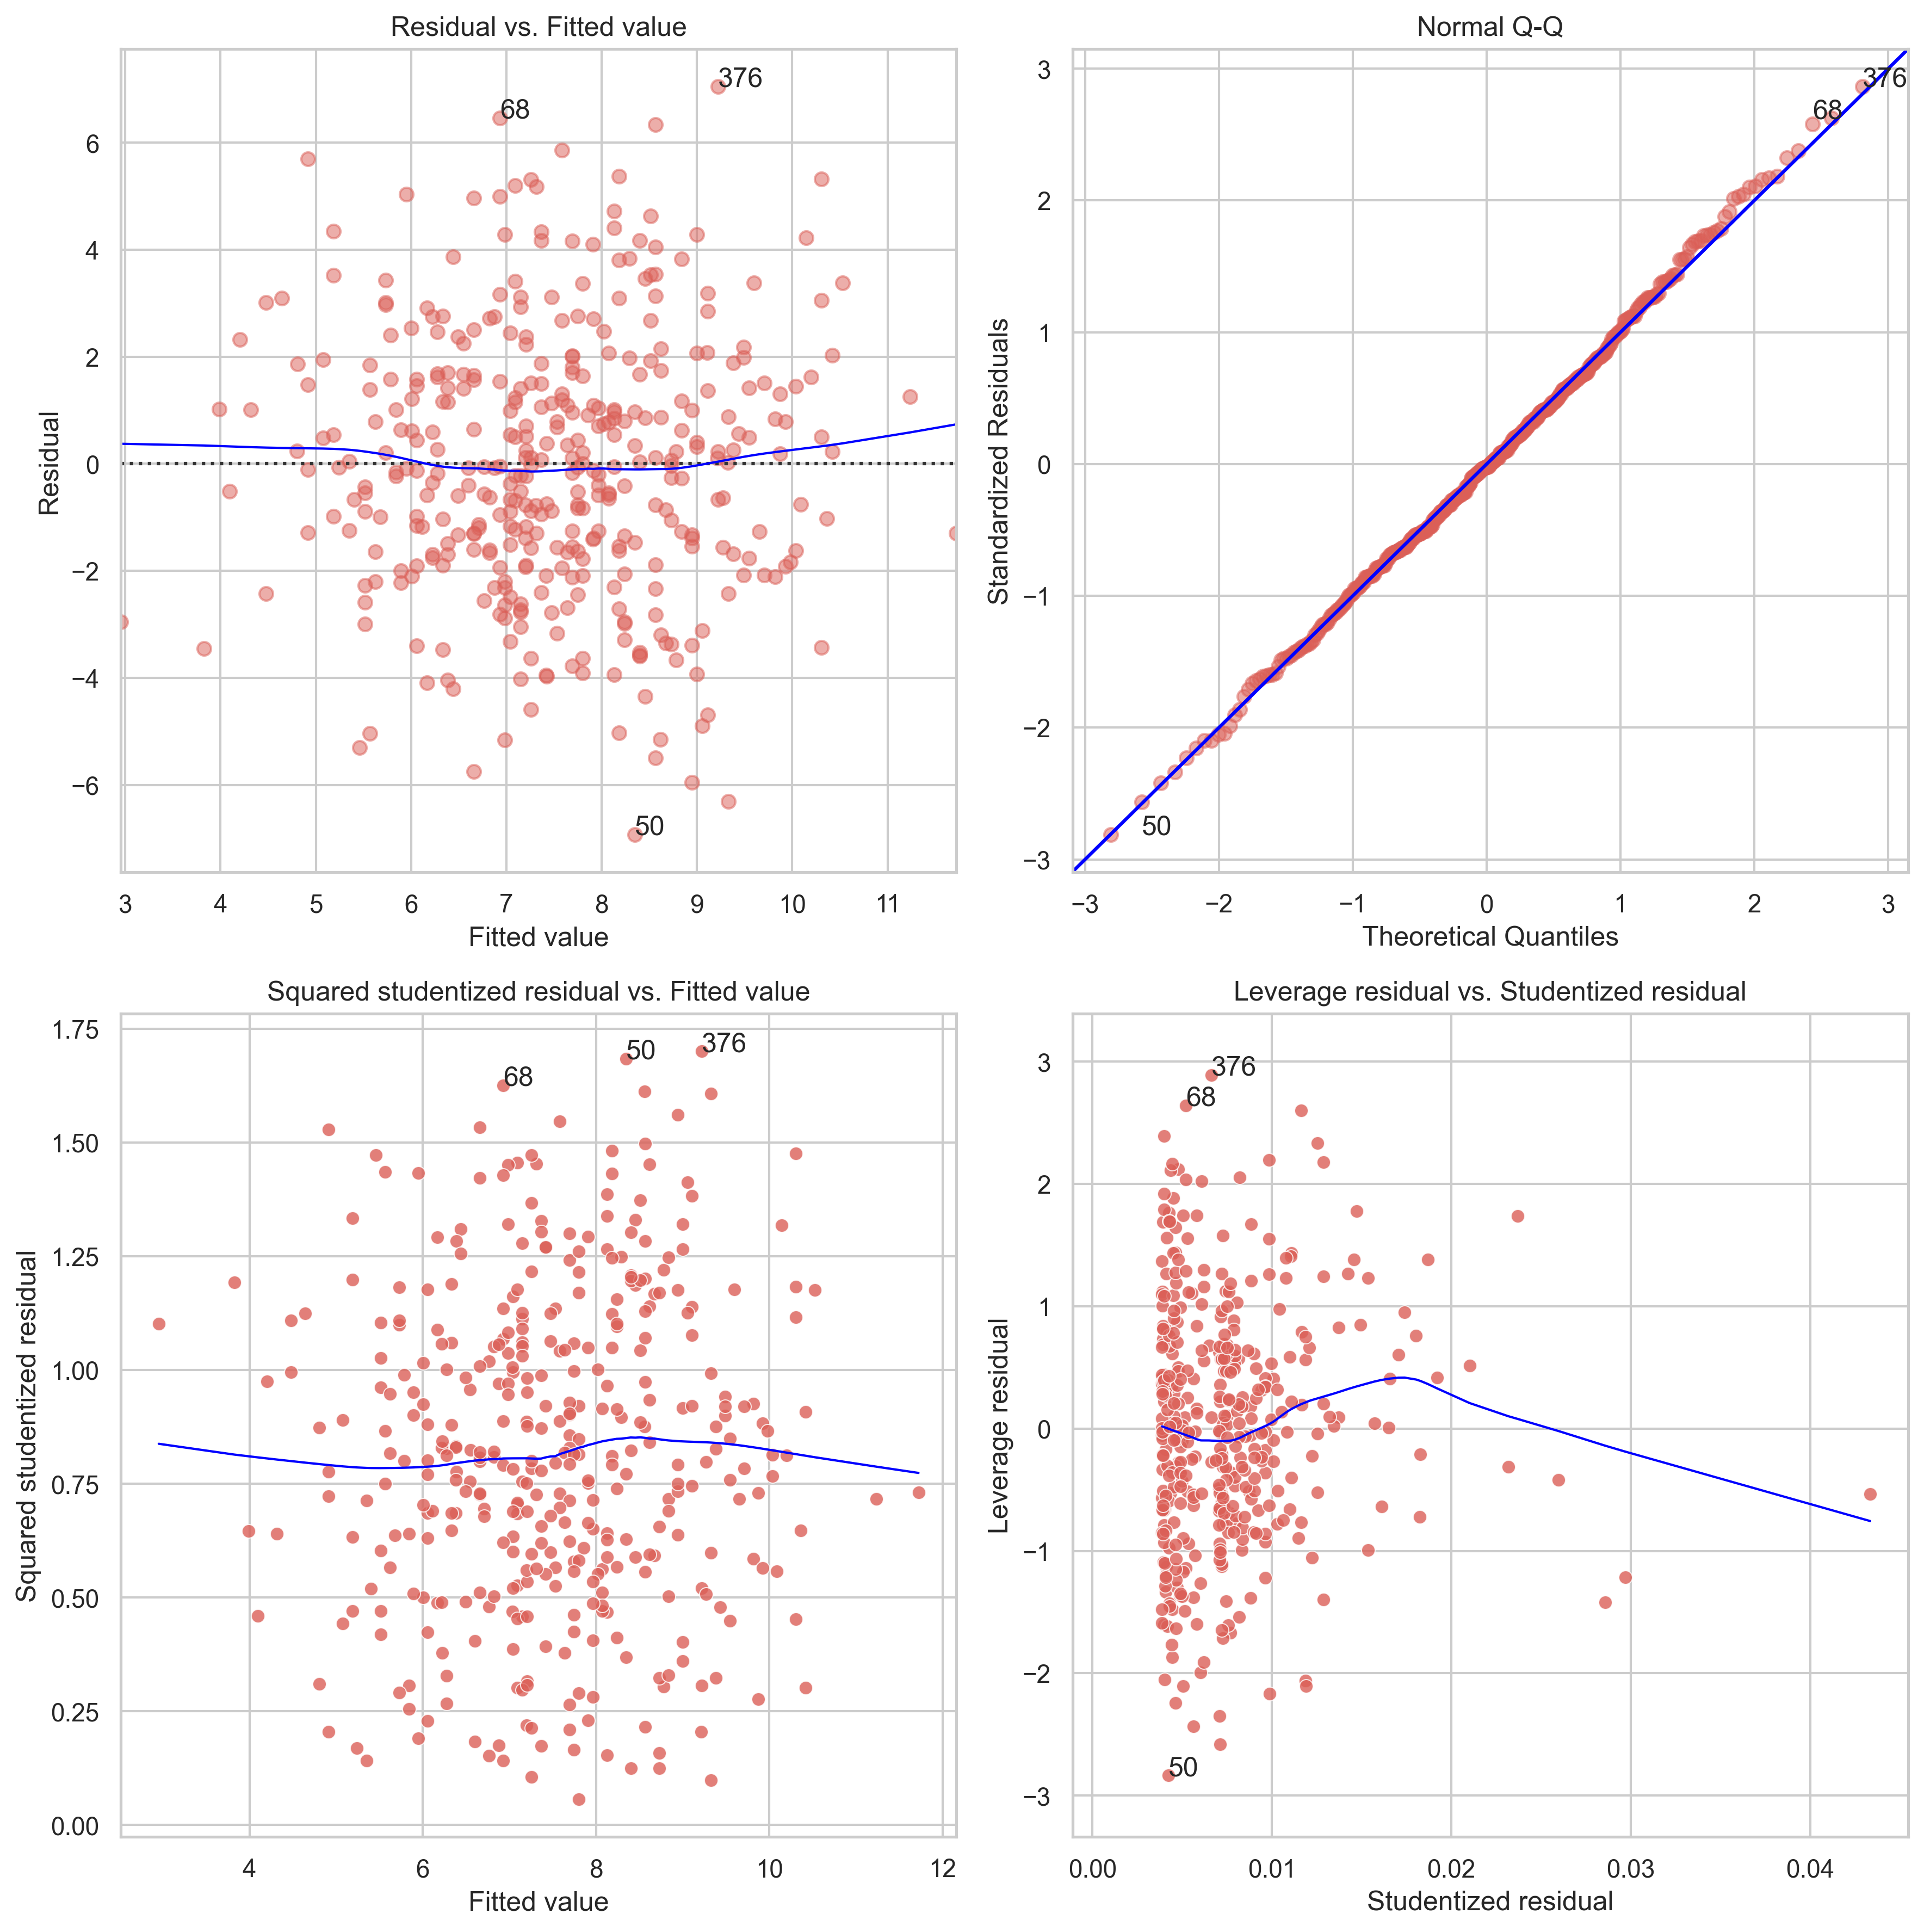

In [78]:
fig, axes = draw_diagnostic_plot(simple_mlr_result)

- **Heteroscedasticity:** from plot 1 (top left), there is no funnel shape, indicating there is no heteroscedasticity.
    - Heteroscedasticity: refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it.
- **Outlier:** from plot 3 (bottom left), we that there is no outlier because there is no observation with absolute squared studentized residual value more than $\sqrt{3} = 1.732$.
- **Leverage Point:** from plot 4 (botton right), we see that there is no high leverage point because none is outside of Cook's distance line (the `ylim` is not large enough to see the line).
- **Collinearity:** from plot 1 (top left), we see that there is no collinearity between predictors.